In [1]:
import pandas as pd

# Load the dataset
file_path = 'TOMATO_FINAL.csv'
df = pd.read_csv(file_path)

# Display the first 5 rows
df.head()


Date   Commodity  Average_Price Unit  Supply_Volume  Temperature  \
0  2022-01-01  Tomato_Big         115.00   kg            0.0          9.0   
1  2022-01-02  Tomato_Big         115.00   kg         8000.0          9.8   
2  2022-01-03  Tomato_Big          95.00   kg        22375.0         10.0   
3  2022-01-04  Tomato_Big          96.67   kg         8000.0         10.2   
4  2022-01-05  Tomato_Big          86.67   kg        32500.0         11.0   

   Precipitation  Wind_Speed  Air_Pressure  Rainfall_MM  USD_TO_NPR  Diesel  \
0            0.0         4.7        1023.5          0.0      117.49   119.0   
1            0.0         4.5        1022.3          0.0      117.49   119.0   
2            0.0         5.3        1020.6          0.0      117.49   119.0   
3            0.0         5.0        1020.6          0.0      117.47   119.0   
4            0.0         5.8        1020.6          0.0      117.55   119.0   

   Season  is_festival  indian_tomato_price  Season_Autumn  Season_Monsoon  \
0  Winter            0               101.00          False           False   
1  Winter            0               115.00          False           False   
2  Winter            0                95.00          False           False   
3  Winter            0                96.67          False           False   
4  Winter            0                86.67          False           False   

   Season_Spring  Season_Winter  Inflation  
0          False           True       6.03  
1          False           True       6.03  
2          False           True       6.03  
3          False           True       6.03  
4          False           True       6.03

In [2]:
# Basic EDA


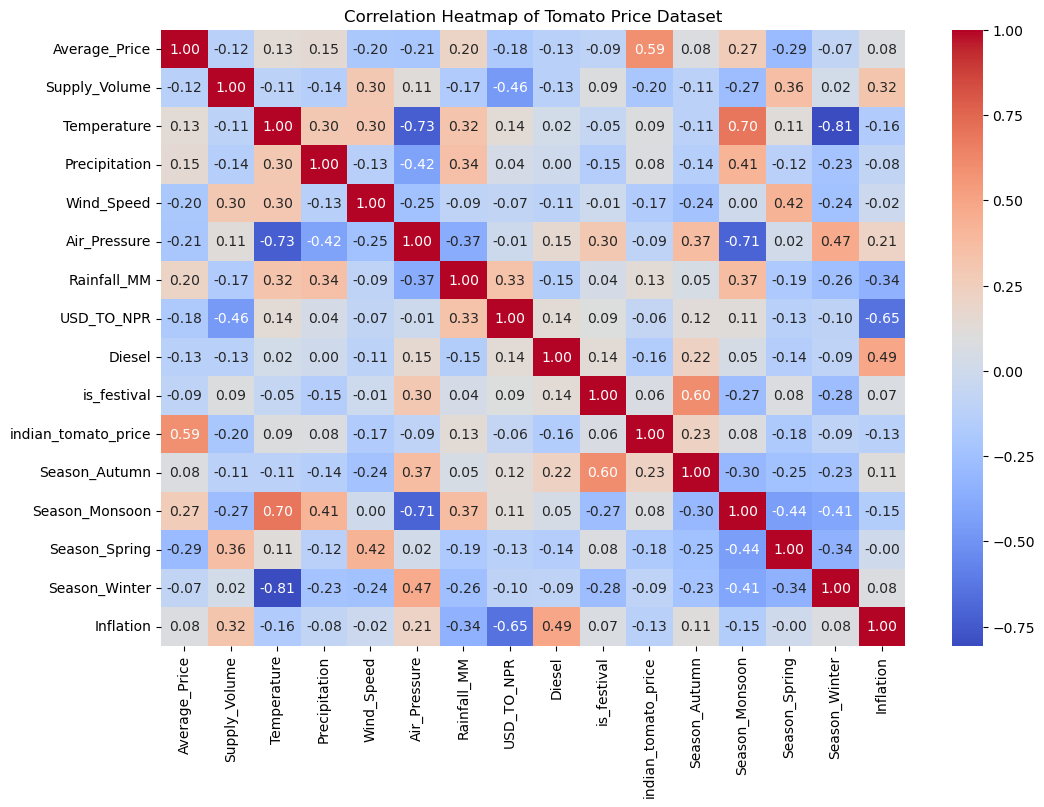

EDA Summary Statistics:


Date  Average_Price  Supply_Volume  \
count                           1389    1389.000000    1389.000000   
mean   2023-11-25 23:59:59.999999744      64.058099   11259.541037   
min              2022-01-01 00:00:00      17.670000       0.000000   
25%              2022-12-14 00:00:00      53.330000       0.000000   
50%              2023-11-26 00:00:00      60.290000    1500.000000   
75%              2024-11-07 00:00:00      74.090000   11250.000000   
max              2025-10-20 00:00:00     170.000000  185920.000000   
std                              NaN      22.037352   21777.720620   

       Temperature  Precipitation   Wind_Speed  Air_Pressure  Rainfall_MM  \
count  1389.000000    1389.000000  1389.000000   1389.000000  1389.000000   
mean     18.869755       4.518272     7.235184   1014.944320     5.901980   
min       5.800000       0.000000     2.100000   1002.100000     0.000000   
25%      14.530000       0.000000     6.200000   1011.800000     0.000000   
50%      20.200000       0.000000     7.000000   1015.000000     0.500000   
75%      23.150000       3.800000     8.280000   1018.550000     7.800000   
max      26.800000      76.200000    13.400000   1025.000000   155.900000   
std       4.861757       9.983160     1.563728      4.509063    11.904979   

        USD_TO_NPR       Diesel  is_festival  indian_tomato_price    Inflation  
count  1389.000000  1389.000000  1389.000000          1389.000000  1389.000000  
mean    130.582649   157.093952     0.197264            68.667730     5.679086  
min     116.680000   119.000000     0.000000            31.600000     1.680000  
25%     129.140000   150.000000     0.000000            55.000000     4.160000  
50%     131.370000   155.000000     0.000000            65.000000     6.030000  
75%     132.830000   166.250000     0.000000            75.000000     7.440000  
max     140.890000   178.000000     1.000000           155.000000     8.640000  
std       5.103658    13.093304     0.398077            19.920296     1.967629

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- Basic EDA ---
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')

# Summary statistics
eda_summary = df.describe()

# Correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Tomato Price Dataset')
plt.show()

# Display summary statistics in your local environment
print("EDA Summary Statistics:")
display(eda_summary)


Dataset Overview

Total records: 1389 days

Date range: From early 2022 to late 2025

Target Variable: Average_Price (daily tomato price at Kalimati Market)

Key Predictors: Weather, Supply, Import, Macroeconomic & Seasonal variables

### 📊 Descriptive Statistics Summary
| Feature                 | Mean       | Std     | Key Insight                                                  |
| ----------------------- | ---------- | ------- | ------------------------------------------------------------ |
| **Average_Price**       | ₹64.06     | ±22.03  | Tomato prices fluctuate moderately, with clear volatility.   |
| **Supply_Volume**       | 11,260 kg  | ±21,778 | High variation indicates uneven market inflow.               |
| **Temperature**         | 18.87°C    | ±4.86   | Seasonal cycles visible — affects yield.                     |
| **Precipitation**       | 4.5 mm/day | ±9.98   | Occasional heavy rainfall.                                   |
| **USD_TO_NPR**          | 130.6      | ±5.1    | Gradual currency depreciation trend.                         |
| **Indian_Tomato_Price** | ₹68.67     | ±19.92  | Slightly higher than domestic average; moderate correlation. |


### Heatmap Analysis (Key Correlations)
| Feature                 | Correlation with Average_Price | Interpretation                                                            |
| ----------------------- | ------------------------------ | ------------------------------------------------------------------------- |
| **Indian_Tomato_Price** | **+0.59**                      | Strong positive — imported tomato prices influence local prices directly. |
| **Temperature**         | +0.13                          | Mild positive — warmer periods often lead to supply disruptions.          |
| **Rainfall_MM**         | +0.20                          | Heavy rainfall can reduce production, increasing prices.                  |
| **Supply_Volume**       | **−0.12**                      | More supply → lower prices, expected negative relationship.               |
| **Air_Pressure**        | **−0.21**                      | Inverse link, potentially reflecting weather transitions.                 |
| **USD_TO_NPR**          | **−0.18**                      | Stronger NPR (lower USD rate) slightly lowers prices (cheaper imports).   |
| **Season_Monsoon**      | +0.27                          | Prices rise in monsoon — low production period.                           |


🧩 Key EDA Insights

Weather dependency: Temperature, rainfall, and wind speed collectively shape price volatility.

Cross-border dependency: Indian tomato prices show a 59% correlation, confirming market integration.

Seasonality: Monsoon periods show consistent upward price pressure.

Economic influences: Exchange rate (USD/NPR) and diesel cost influence price indirectly via transport and import costs.

Festival impact: Slight, but noticeable spikes occur during festival periods (moderate correlation).

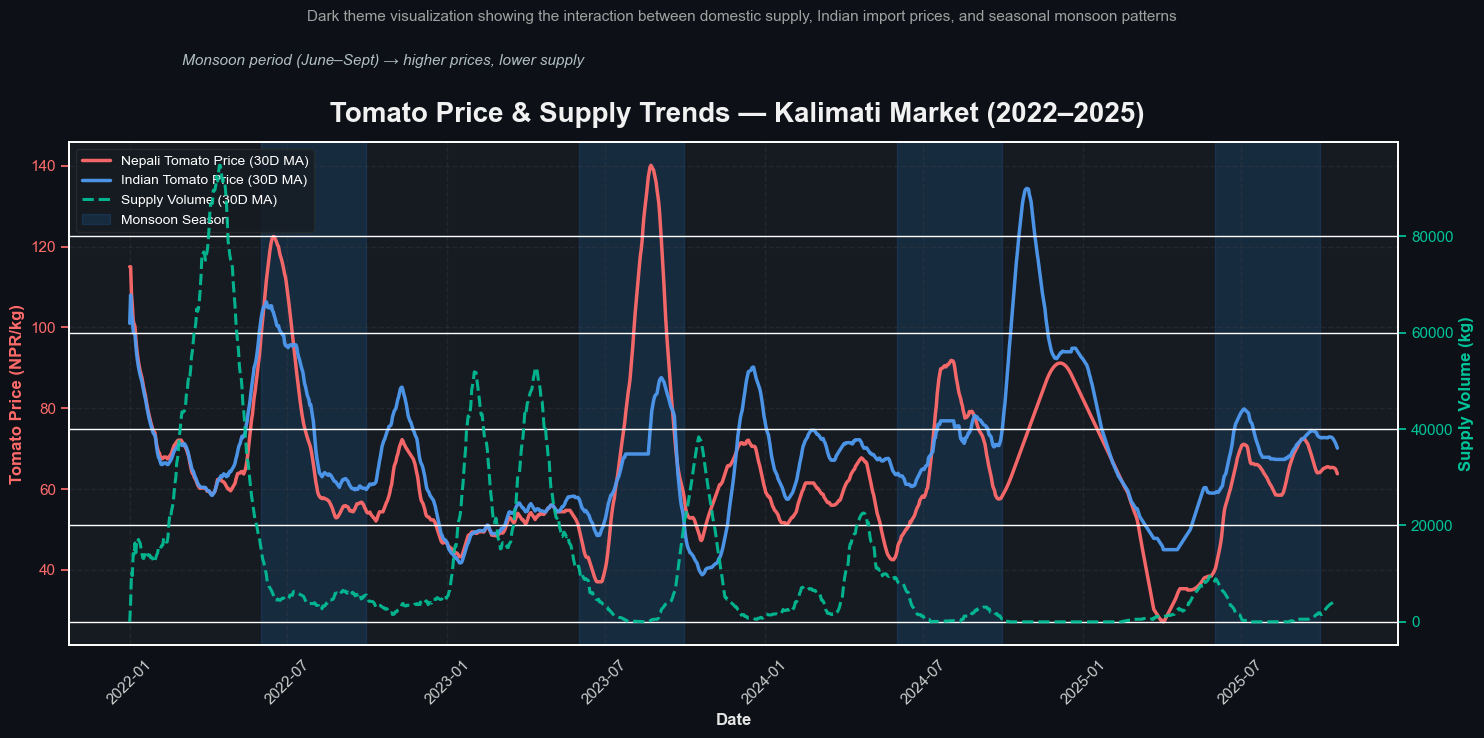

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
import pandas as pd

# --- Data Prep ---
if not isinstance(df.index, pd.DatetimeIndex):
    df['Date'] = pd.to_datetime(df['Date'])
    df = df.sort_values('Date')
    df.set_index('Date', inplace=True)

# Rolling means for smoothness
df['Nepali_Rolling'] = df['Average_Price'].rolling(window=30, min_periods=1).mean()
df['Indian_Rolling'] = df['indian_tomato_price'].rolling(window=30, min_periods=1).mean()
df['Supply_Rolling'] = df['Supply_Volume'].rolling(window=30, min_periods=1).mean()

# --- Dark Theme Setup ---
sns.set_theme(style="darkgrid")
plt.style.use("dark_background")

fig, ax1 = plt.subplots(figsize=(15, 8))
fig.patch.set_facecolor('#0D1117')     # Outer background
ax1.set_facecolor('#161B22')           # Chart background

# --- Plot Lines ---
ax1.plot(df.index, df['Nepali_Rolling'], color='#FF6B6B', linewidth=2.5, label='Nepali Tomato Price (30D MA)', alpha=0.95)
ax1.plot(df.index, df['Indian_Rolling'], color='#4E9AF1', linewidth=2.5, label='Indian Tomato Price (30D MA)', alpha=0.95)

# Secondary Y-axis (Supply Volume)
ax2 = ax1.twinx()
ax2.plot(df.index, df['Supply_Rolling'], color='#00C49A', linewidth=2.2, linestyle='--', label='Supply Volume (30D MA)', alpha=0.9)

# --- Monsoon Shading (June–Sept) ---
for year in df.index.year.unique():
    ax1.axvspan(pd.Timestamp(f'{year}-06-01'), pd.Timestamp(f'{year}-09-30'),
                color='#1E88E5', alpha=0.15, zorder=0)

# --- Titles and Labels ---
ax1.set_title(" Tomato Price & Supply Trends — Kalimati Market (2022–2025)",
              fontsize=20, fontweight='bold', color='#F1F1F1', pad=15)
plt.suptitle("Dark theme visualization showing the interaction between domestic supply, Indian import prices, and seasonal monsoon patterns",
             fontsize=11, color='#A0A0A0', y=0.92)

ax1.set_xlabel("Date", fontsize=12, color='#E5E5E5', fontweight='bold')
ax1.set_ylabel("Tomato Price (NPR/kg)", fontsize=12, color='#FF6B6B', fontweight='bold')
ax2.set_ylabel("Supply Volume (kg)", fontsize=12, color='#00C49A', fontweight='bold')

# --- Grid and Ticks ---
ax1.tick_params(axis='x', colors='#CCCCCC', rotation=45)
ax1.tick_params(axis='y', colors='#FF6B6B')
ax2.tick_params(axis='y', colors='#00C49A')
ax1.grid(True, linestyle='--', color='#444', alpha=0.3)

# --- Legends ---
price_patch = mpatches.Patch(color='#1E88E5', alpha=0.15, label='Monsoon Season (June–Sept)')
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
leg = ax1.legend(lines1 + lines2 + [price_patch],
                 labels1 + labels2 + ['Monsoon Season'],
                 loc='upper left', fontsize=10, frameon=True)
leg.get_frame().set_edgecolor('#2C2C2C')
leg.get_frame().set_facecolor('#161B22')

# --- Text Annotation ---
ax1.text(df.index[60], df['Average_Price'].max()-5,
         "Monsoon period (June–Sept) → higher prices, lower supply",
         fontsize=11, color='#B0BEC5', style='italic')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


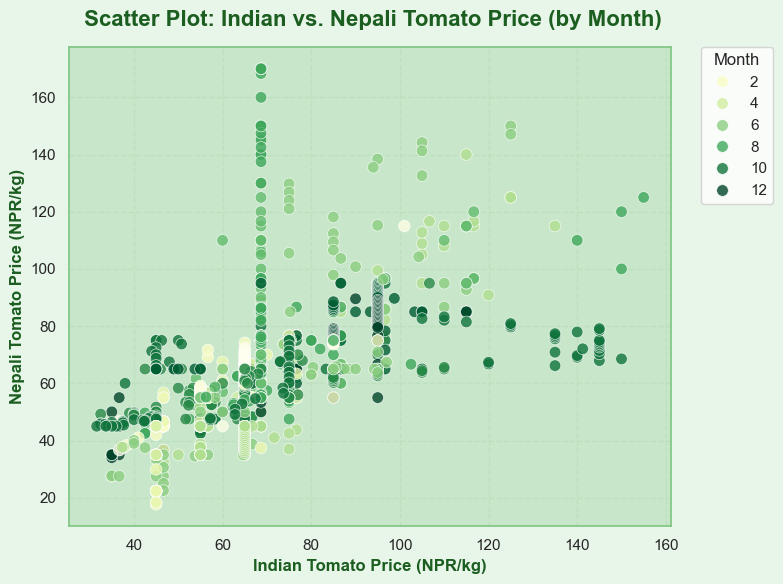

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Ensure Date is datetime
if not isinstance(df.index, pd.DatetimeIndex):
    df['Date'] = pd.to_datetime(df['Date'])
    df = df.set_index('Date')

# Create month column for hue
df['Month'] = df.index.month

# --- Green Theme Setup ---
plt.figure(figsize=(8,6))
sns.set_theme(style="whitegrid")
plt.gcf().set_facecolor('#E8F5E9')
ax = plt.gca()
ax.set_facecolor('#C8E6C9')

# --- Scatter Plot with HUE ---
sns.scatterplot(
    data=df,
    x='indian_tomato_price',
    y='Average_Price',
    hue='Month',
    palette='YlGn',
    alpha=0.8,
    s=70,
    edgecolor='white',
    linewidth=0.5
)

# --- Titles & Labels ---
plt.title(" Scatter Plot: Indian vs. Nepali Tomato Price (by Month)",
          fontsize=16, fontweight='bold', color='#1B5E20', pad=15)
plt.xlabel("Indian Tomato Price (NPR/kg)", fontsize=12, color='#1B5E20', fontweight='bold')
plt.ylabel("Nepali Tomato Price (NPR/kg)", fontsize=12, color='#1B5E20', fontweight='bold')

# --- Styling ---
plt.grid(alpha=0.3, linestyle='--', color='#A5D6A7')
for spine in ax.spines.values():
    spine.set_edgecolor('#81C784')

plt.legend(title="Month", bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.tight_layout()
plt.show()


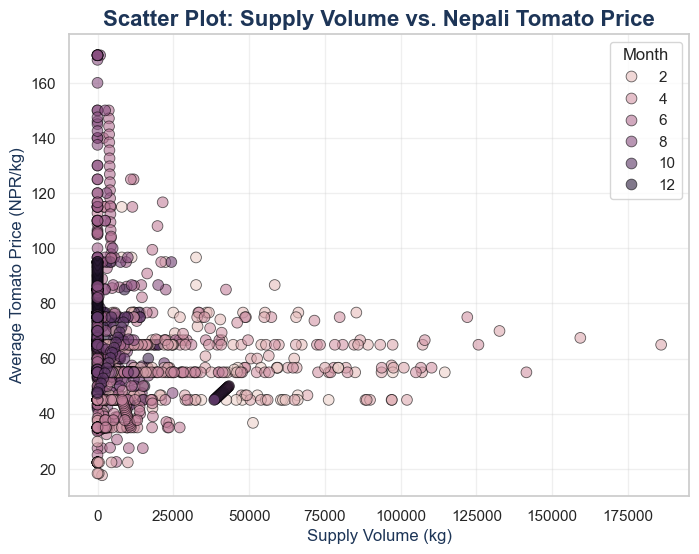

In [6]:
plt.figure(figsize=(8,6))
sns.set_theme(style="whitegrid")

sns.scatterplot(
    data=df,
    x='Supply_Volume',
    y='Average_Price',
    color='#00C49A',
    alpha=0.6,
    s=60,
    edgecolor='black',
    hue = 'Month'
    
)

plt.title("Scatter Plot: Supply Volume vs. Nepali Tomato Price", fontsize=16, fontweight='bold', color='#1D3557')
plt.xlabel("Supply Volume (kg)", fontsize=12, color='#1D3557')
plt.ylabel("Average Tomato Price (NPR/kg)", fontsize=12, color='#1D3557')
plt.grid(alpha=0.3)
plt.show()


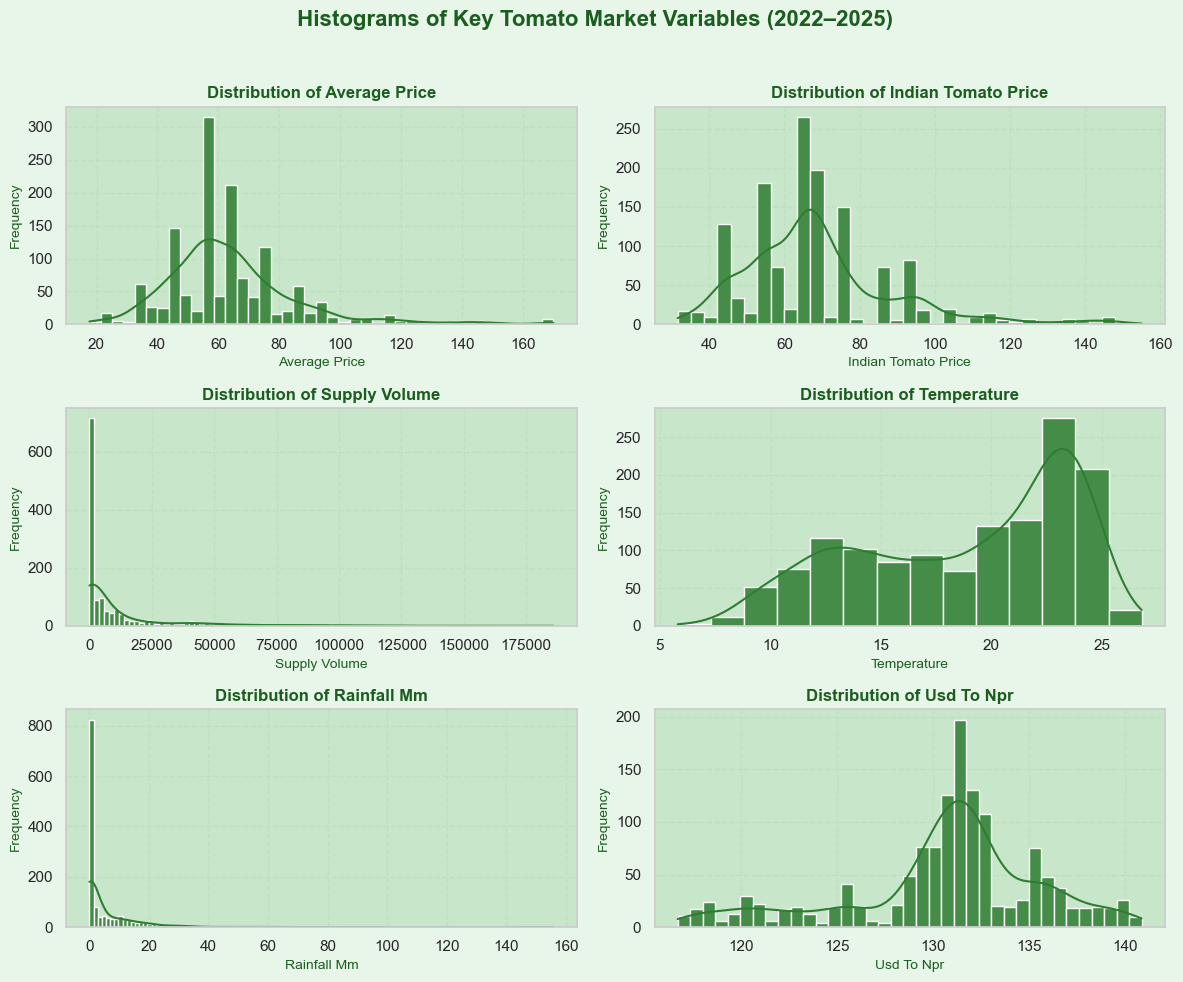

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# --- Green Theme Setup ---
sns.set_theme(style="whitegrid")
plt.rcParams["axes.facecolor"] = "#C8E6C9"   # Light green axes
plt.rcParams["figure.facecolor"] = "#E8F5E9" # Softer green figure background
plt.rcParams["grid.color"] = "#A5D6A7"

# --- List of key columns to visualize ---
cols_to_plot = [
    'Average_Price',
    'indian_tomato_price',
    'Supply_Volume',
    'Temperature',
    'Rainfall_MM',
    'USD_TO_NPR'
]

# --- Create subplots ---
fig, axes = plt.subplots(3, 2, figsize=(12, 10))
axes = axes.flatten()

# --- Plot histograms for each variable ---
for i, col in enumerate(cols_to_plot):
    sns.histplot(
        data=df, x=col,
        kde=True, color='#2E7D32',
        ax=axes[i],
        edgecolor='white',
        linewidth=1.0,
        alpha=0.85
    )
    axes[i].set_title(f"Distribution of {col.replace('_',' ').title()}",
                      fontsize=12, fontweight='bold', color='#1B5E20')
    axes[i].set_xlabel(col.replace('_',' ').title(), fontsize=10, color='#1B5E20')
    axes[i].set_ylabel("Frequency", fontsize=10, color='#1B5E20')
    axes[i].grid(alpha=0.3, linestyle='--')

# --- Global figure style ---
plt.suptitle(" Histograms of Key Tomato Market Variables (2022–2025)",
             fontsize=16, fontweight='bold', color='#1B5E20')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


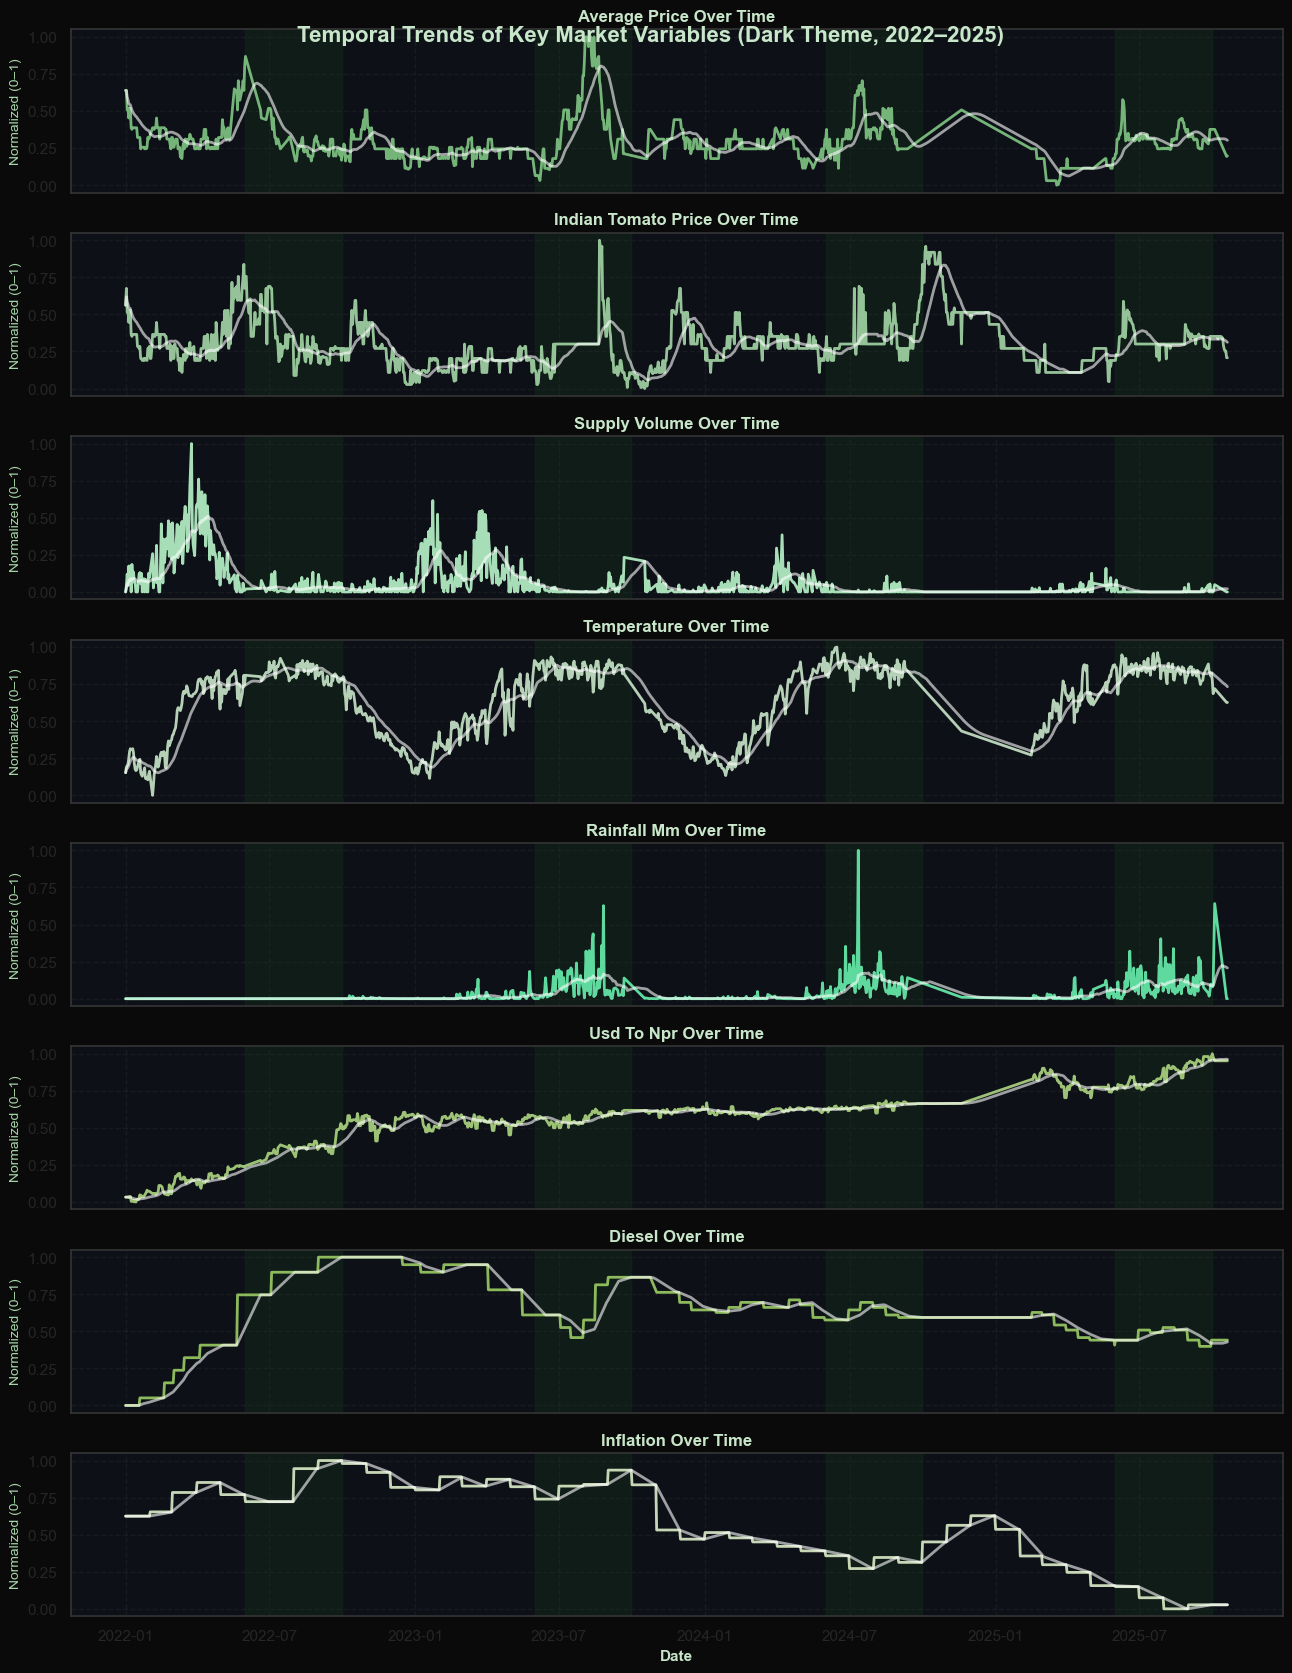

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# --- Dark Theme Setup ---
plt.style.use("dark_background")
sns.set_theme(style="darkgrid")

# Set dark background colors
plt.rcParams["axes.facecolor"] = "#0D1117"    # near-black chart background
plt.rcParams["figure.facecolor"] = "#0A0A0A"  # darker figure background
plt.rcParams["grid.color"] = "#333333"        # subtle grid

# --- Ensure Date index ---
if not isinstance(df.index, pd.DatetimeIndex):
    df['Date'] = pd.to_datetime(df['Date'])
    df = df.set_index('Date')

# --- Continuous variables to include ---
continuous_cols = [
    'Average_Price',
    'indian_tomato_price',
    'Supply_Volume',
    'Temperature',
    'Rainfall_MM',
    'USD_TO_NPR',
    'Diesel',
    'Inflation'
]
continuous_cols = [col for col in continuous_cols if col in df.columns]

# --- Normalize (0–1) for comparison ---
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df[continuous_cols]),
                         columns=continuous_cols, index=df.index)

# --- Define light green palette for dark theme ---
palette = {
    'Average_Price': '#81C784',        # light mint
    'indian_tomato_price': '#A5D6A7',  # soft jade
    'Supply_Volume': '#B9F6CA',        # pale green
    'Temperature': '#C8E6C9',          # cool green
    'Rainfall_MM': '#69F0AE',          # neon green
    'USD_TO_NPR': '#AED581',           # lime tint
    'Diesel': '#9CCC65',               # vibrant green
    'Inflation': '#DCEDC8'             # very light green
}

# --- Create subplots ---
n = len(continuous_cols)
fig, axes = plt.subplots(n, 1, figsize=(13, 18), sharex=True)
fig.suptitle("Temporal Trends of Key Market Variables (Dark Theme, 2022–2025)", 
             fontsize=16, fontweight='bold', color='#C8E6C9', y=0.92)

# --- Plot each variable ---
for i, col in enumerate(continuous_cols):
    sns.lineplot(
        data=df_scaled,
        x=df_scaled.index,
        y=col,
        color=palette.get(col, '#81C784'),
        linewidth=2.0,
        alpha=0.9,
        ax=axes[i]
    )

    # Add rolling mean for smoother trend
    sns.lineplot(
        data=df_scaled[col].rolling(window=30, min_periods=1).mean(),
        color='#FFFFFF',
        linewidth=2.0,
        alpha=0.6,
        ax=axes[i]
    )

    # Highlight monsoon (June–Sept)
    for year in df_scaled.index.year.unique():
        axes[i].axvspan(pd.Timestamp(f'{year}-06-01'),
                        pd.Timestamp(f'{year}-09-30'),
                        color='#1B5E20', alpha=0.15, zorder=0)

    # Titles & labels
    axes[i].set_title(f"{col.replace('_', ' ').title()} Over Time", fontsize=12, fontweight='bold', color='#C8E6C9')
    axes[i].set_ylabel("Normalized (0–1)", fontsize=10, color='#A5D6A7')
    axes[i].grid(alpha=0.2, linestyle='--', color='#444444')
    for spine in axes[i].spines.values():
        spine.set_edgecolor('#333333')

# --- Shared X-axis label ---
axes[-1].set_xlabel("Date", fontsize=11, fontweight='bold', color='#C8E6C9')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


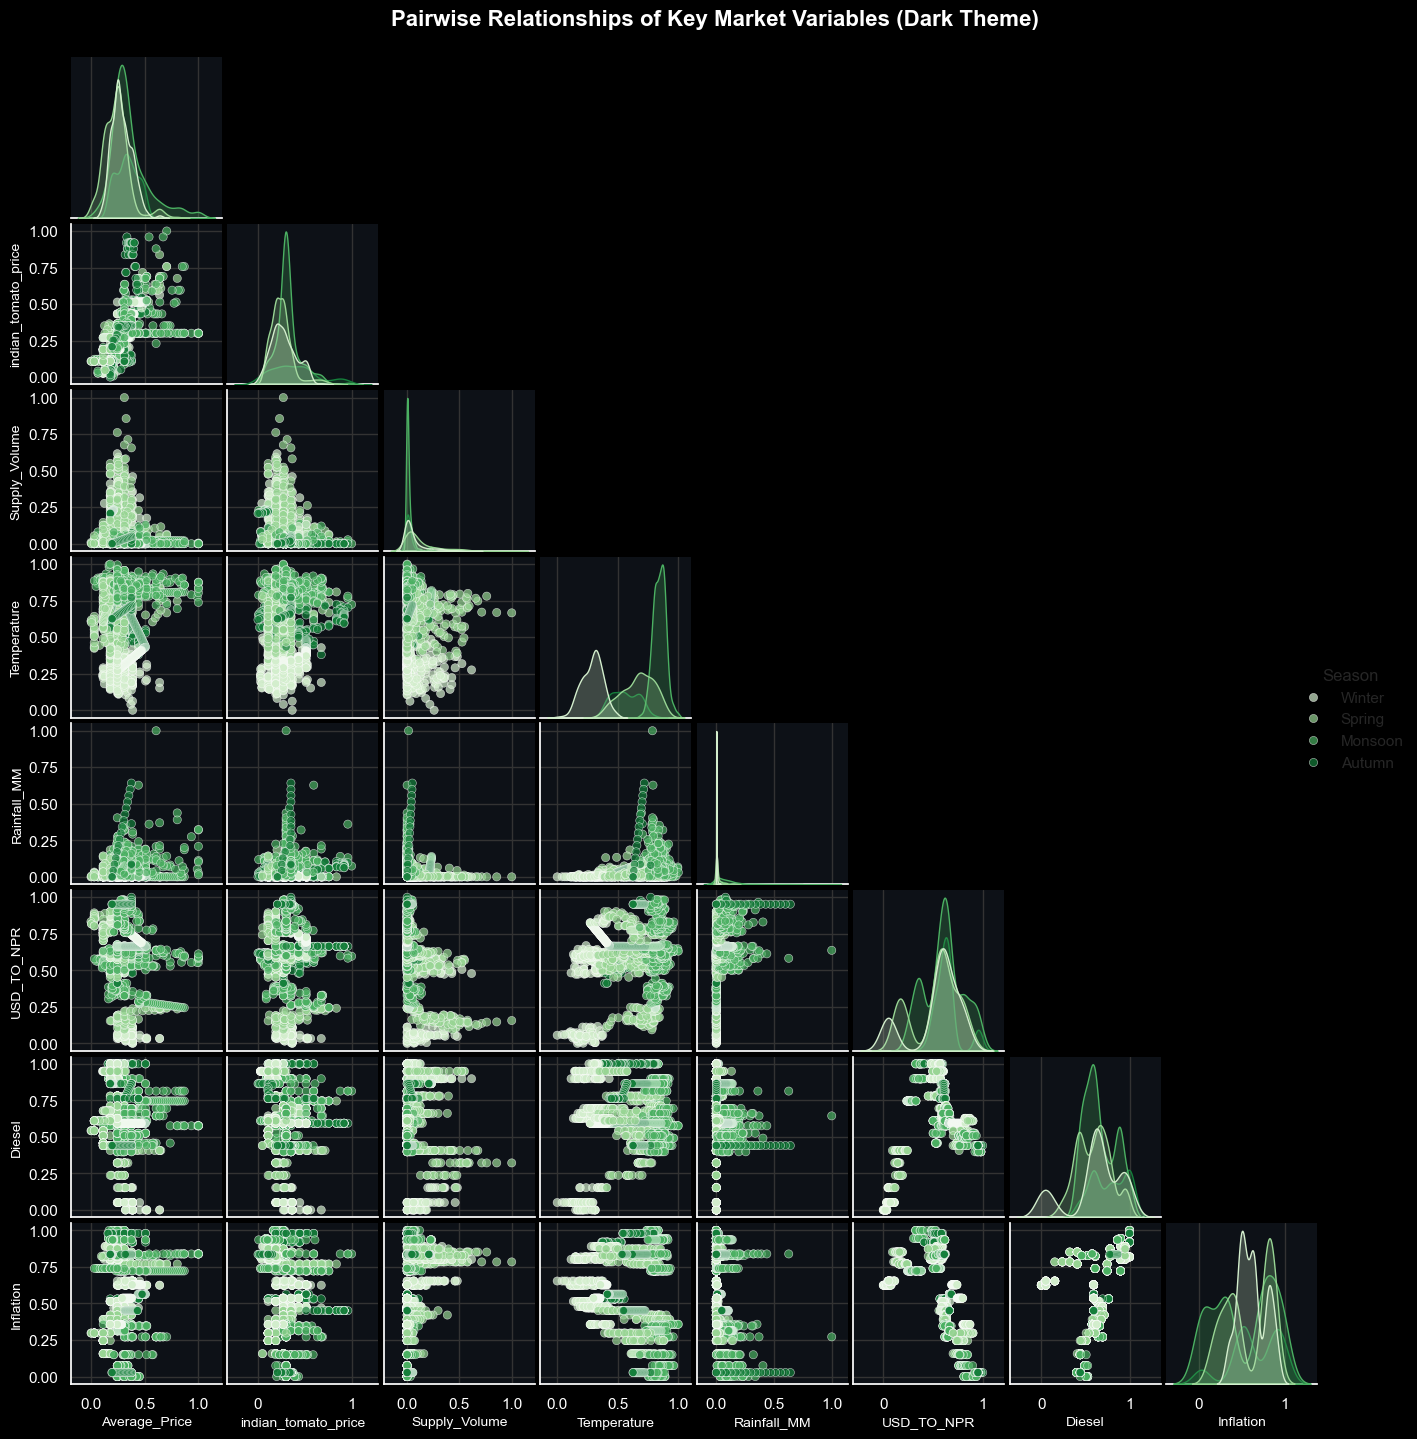

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# --- Ensure Date index ---
if not isinstance(df.index, pd.DatetimeIndex):
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)

# --- Continuous variables to include ---
continuous_cols = [
    'Average_Price',
    'indian_tomato_price',
    'Supply_Volume',
    'Temperature',
    'Rainfall_MM',
    'USD_TO_NPR',
    'Diesel',
    'Inflation'
]
continuous_cols = [col for col in continuous_cols if col in df.columns]

# --- Normalize values for better visualization ---
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df[continuous_cols]),
                         columns=continuous_cols, index=df.index)

# --- Add Season column if missing ---
if 'Season' not in df.columns:
    df['Month'] = df.index.month
    def get_season(month):
        if month in [12, 1, 2]:
            return 'Winter'
        elif month in [3, 4, 5]:
            return 'Spring'
        elif month in [6, 7, 8, 9]:
            return 'Monsoon'
        else:
            return 'Autumn'
    df['Season'] = df['Month'].apply(get_season)

df_scaled['Season'] = df['Season']

# --- Dark Theme Setup ---
plt.style.use("dark_background")
sns.set_theme(style="darkgrid")

plt.rcParams["axes.facecolor"] = "#0D1117"    # dark navy background
plt.rcParams["figure.facecolor"] = "#000000"  # black outer background
plt.rcParams["grid.color"] = "#333333"        # subtle grid
plt.rcParams["axes.labelcolor"] = "white"
plt.rcParams["xtick.color"] = "white"
plt.rcParams["ytick.color"] = "white"

# --- Dynamic green palette (auto for your seasons) ---
unique_seasons = df_scaled['Season'].unique()
palette = dict(zip(unique_seasons, sns.color_palette("Greens", len(unique_seasons))))

# --- Create Pairplot ---
pair = sns.pairplot(
    df_scaled,
    vars=continuous_cols,
    hue='Season',
    diag_kind='kde',
    palette=palette,
    corner=True,
    plot_kws={'alpha': 0.7, 's': 35, 'edgecolor': 'white', 'linewidth': 0.4}
)

# --- Style title & labels ---
pair.fig.suptitle("Pairwise Relationships of Key Market Variables (Dark Theme)",
                  fontsize=16, fontweight='bold', color='white', y=1.02)
pair.fig.set_size_inches(14, 14)

# White axis labels for all subplots
for ax in pair.axes.flat:
    if ax:
        ax.set_xlabel(ax.get_xlabel(), color='white', fontsize=10)
        ax.set_ylabel(ax.get_ylabel(), color='white', fontsize=10)
        ax.title.set_color('white')

# Make diagonal kde plots white for visibility
for i in range(len(continuous_cols)):
    for j in range(len(continuous_cols)):
        if i == j and pair.axes[i, j] is not None:
            pair.axes[i, j].patch.set_facecolor("#0D1117")

plt.show()


#### Modeling Part


 Step 1 — Data Preparation

In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# ==============================================================
# ✅ STEP 1: Ensure Date is datetime index
# ==============================================================

if 'Date' in df.columns:
    # Convert only if not already datetime
    if not pd.api.types.is_datetime64_any_dtype(df['Date']):
        df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

    # Set Date as index only if not already
    if not isinstance(df.index, pd.DatetimeIndex):
        df.set_index('Date', inplace=True)

# Sort chronologically
df = df.sort_index()

# ==============================================================
# ✅ STEP 2: Clean data — drop irrelevant or non-numeric columns
# ==============================================================

df = df.drop(columns=['Commodity', 'Unit', 'Season'], errors='ignore')

# ==============================================================
# ✅ STEP 3: Create lag and time features
# ==============================================================

# Lag features to capture recent history
for lag in [1, 7, 30]:
    df[f'Average_Price_lag_{lag}'] = df['Average_Price'].shift(lag)

# Time-based features
df['Month'] = df.index.month
df['DayOfWeek'] = df.index.dayofweek
df['Year'] = df.index.year

# Optional: Encode cyclical patterns for Month & DayOfWeek
df['Month_sin'] = np.sin(2 * np.pi * df['Month'] / 12)
df['Month_cos'] = np.cos(2 * np.pi * df['Month'] / 12)
df['DayOfWeek_sin'] = np.sin(2 * np.pi * df['DayOfWeek'] / 7)
df['DayOfWeek_cos'] = np.cos(2 * np.pi * df['DayOfWeek'] / 7)

# Drop NaN rows from lag creation
df = df.dropna()

# ==============================================================
# ✅ STEP 4: Define target and features
# ==============================================================

target = 'Average_Price'
features = [col for col in df.columns if col != target]

X = df[features]
y = df[target]

# ==============================================================
# ✅ STEP 5: Time-based split (80% train, 20% test)
# ==============================================================

train_size = int(len(df) * 0.8)
X_train, X_test = X.iloc[:train_size], X.iloc[train_size:]
y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]

# ==============================================================
# ✅ STEP 6: Apply StandardScaler (exclude Year & cyclic features)
# ==============================================================

# Define which columns NOT to scale
exclude_from_scaling = ['Year', 'Month', 'DayOfWeek',
                        'Month_sin', 'Month_cos',
                        'DayOfWeek_sin', 'DayOfWeek_cos']

scale_features = [col for col in X_train.columns if col not in exclude_from_scaling]

# Initialize scaler
scaler = StandardScaler()

# Fit only on train data
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[scale_features] = scaler.fit_transform(X_train[scale_features])
X_test_scaled[scale_features] = scaler.transform(X_test[scale_features])

# ==============================================================
# ✅ STEP 7: Final check
# ==============================================================

print("✅ Preprocessing complete.")
print(f"Training samples: {len(X_train_scaled)} | Testing samples: {len(X_test_scaled)}")
print("Feature count:", X_train_scaled.shape[1])
print("\nScaled data preview:")
display(X_train_scaled.head())


✅ Preprocessing complete.
Training samples: 1087 | Testing samples: 272
Feature count: 28

Scaled data preview:


Supply_Volume  Temperature  Precipitation  Wind_Speed  \
Date                                                                
2022-01-31       0.188411    -1.971274      -0.420611   -0.107459   
2022-02-01       0.501902    -2.147182       0.600795    0.255804   
2022-02-02       0.815393    -2.323089       1.621225    0.612803   
2022-02-03       1.128883    -2.498996       2.642631    0.976066   
2022-02-04       1.442374    -2.674903       3.663061    1.333065   

            Air_Pressure  Rainfall_MM  USD_TO_NPR    Diesel  is_festival  \
Date                                                                       
2022-01-31     -0.277863    -0.455017   -2.723844 -3.153568    -0.510902   
2022-02-01     -0.321577    -0.455017   -2.748812 -3.153568    -0.510902   
2022-02-02     -0.365291    -0.455017   -2.773781 -3.153568    -0.510902   
2022-02-03     -0.409005    -0.455017   -2.798749 -3.153568    -0.510902   
2022-02-04     -0.452719    -0.455017   -2.823718 -3.153568    -0.510902   

            indian_tomato_price  ...  Month  Average_Price_lag_1  \
Date                             ...                               
2022-01-31            -0.154055  ...      1            -0.059865   
2022-02-01            -0.624748  ...      2             0.014198   
2022-02-02            -0.624748  ...      2             0.125071   
2022-02-03            -0.232661  ...      2             0.235944   
2022-02-04             0.316639  ...      2             0.346817   

            Average_Price_lag_7  Average_Price_lag_30  DayOfWeek  Year  \
Date                                                                     
2022-01-31            -0.426604              2.139578          0  2022   
2022-02-01            -0.500633              2.139578          1  2022   
2022-02-02            -0.426604              1.259510          2  2022   
2022-02-03            -0.500633              1.332996          3  2022   
2022-02-04            -0.426604              0.892962          4  2022   

            Month_sin  Month_cos  DayOfWeek_sin  DayOfWeek_cos  
Date                                                            
2022-01-31   0.500000   0.866025       0.000000       1.000000  
2022-02-01   0.866025   0.500000       0.781831       0.623490  
2022-02-02   0.866025   0.500000       0.974928      -0.222521  
2022-02-03   0.866025   0.500000       0.433884      -0.900969  
2022-02-04   0.866025   0.500000      -0.433884      -0.900969  

[5 rows x 28 columns]

Step 2 — Baseline Linear Regression

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

lr_rmse = np.sqrt(mean_squared_error(y_test, lr_pred))
lr_mae = mean_absolute_error(y_test, lr_pred)
lr_r2 = r2_score(y_test, lr_pred)

print(f"Linear Regression → RMSE: {lr_rmse:.2f}, MAE: {lr_mae:.2f}, R²: {lr_r2:.3f}")


Linear Regression → RMSE: 3.85, MAE: 2.60, R²: 0.947


Step 3 — Ridge, Lasso, Random Forest, XGBoost, LightGBM

In [12]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor


In [13]:
# ==============================================================
# ✅ STEP 2: Define Models
# ==============================================================

models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0, random_state=42),
    "Lasso Regression": Lasso(alpha=0.001, random_state=42),
    "Random Forest": RandomForestRegressor(
        n_estimators=300, max_depth=10, random_state=42),
    "XGBoost": XGBRegressor(
        n_estimators=500, learning_rate=0.05, max_depth=5,
        subsample=0.8, colsample_bytree=0.8, random_state=42, objective='reg:squarederror'),
    "LightGBM": LGBMRegressor(
        n_estimators=500, learning_rate=0.05, max_depth=-1,
        subsample=0.8, colsample_bytree=0.8, random_state=42)
}



In [14]:
# ==============================================================
# ✅ STEP 3: Train and Evaluate Each Model
# ==============================================================

results = []

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results.append({
        "Model": name,
        "RMSE": rmse,
        "MAE": mae,
        "R²": r2
    })
    
    print(f"✅ {name} Results:")
    print(f"   RMSE: {rmse:.3f}")
    print(f"   MAE : {mae:.3f}")
    print(f"   R²  : {r2:.4f}")
    print("-" * 50)



✅ Linear Regression Results:
   RMSE: 3.848
   MAE : 2.600
   R²  : 0.9466
--------------------------------------------------
✅ Ridge Regression Results:
   RMSE: 3.853
   MAE : 2.607
   R²  : 0.9465
--------------------------------------------------
✅ Lasso Regression Results:
   RMSE: 3.847
   MAE : 2.602
   R²  : 0.9467
--------------------------------------------------
✅ Random Forest Results:
   RMSE: 6.829
   MAE : 5.548
   R²  : 0.8319
--------------------------------------------------
✅ XGBoost Results:
   RMSE: 9.760
   MAE : 8.138
   R²  : 0.6566
--------------------------------------------------
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000497 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2688
[LightGBM] [Info] Number of data points in the train set: 1087, number of used features: 28
[LightGBM] [Info] Start training from score 66.351113
✅ LightGBM Results:
   RMSE: 8.480
   MAE : 

In [15]:
# ==============================================================
# ✅ STEP 4: Combine All Results into DataFrame
# ==============================================================

results_df = pd.DataFrame(results).sort_values(by='R²', ascending=False)

print("\n📊 Model Performance Comparison:")
display(results_df)



📊 Model Performance Comparison:


Model      RMSE       MAE        R²
2   Lasso Regression  3.846659  2.601734  0.946653
0  Linear Regression  3.847534  2.600309  0.946628
1   Ridge Regression  3.853359  2.607392  0.946467
3      Random Forest  6.829293  5.548087  0.831850
5           LightGBM  8.479682  6.847261  0.740759
4            XGBoost  9.759861  8.137536  0.656575

C:\Users\User\AppData\Local\Temp\ipykernel_32048\1443264984.py:46: UserWarning: Glyph 127813 (\N{TOMATO}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\User\Miniconda3\envs\myConda\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127813 (\N{TOMATO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


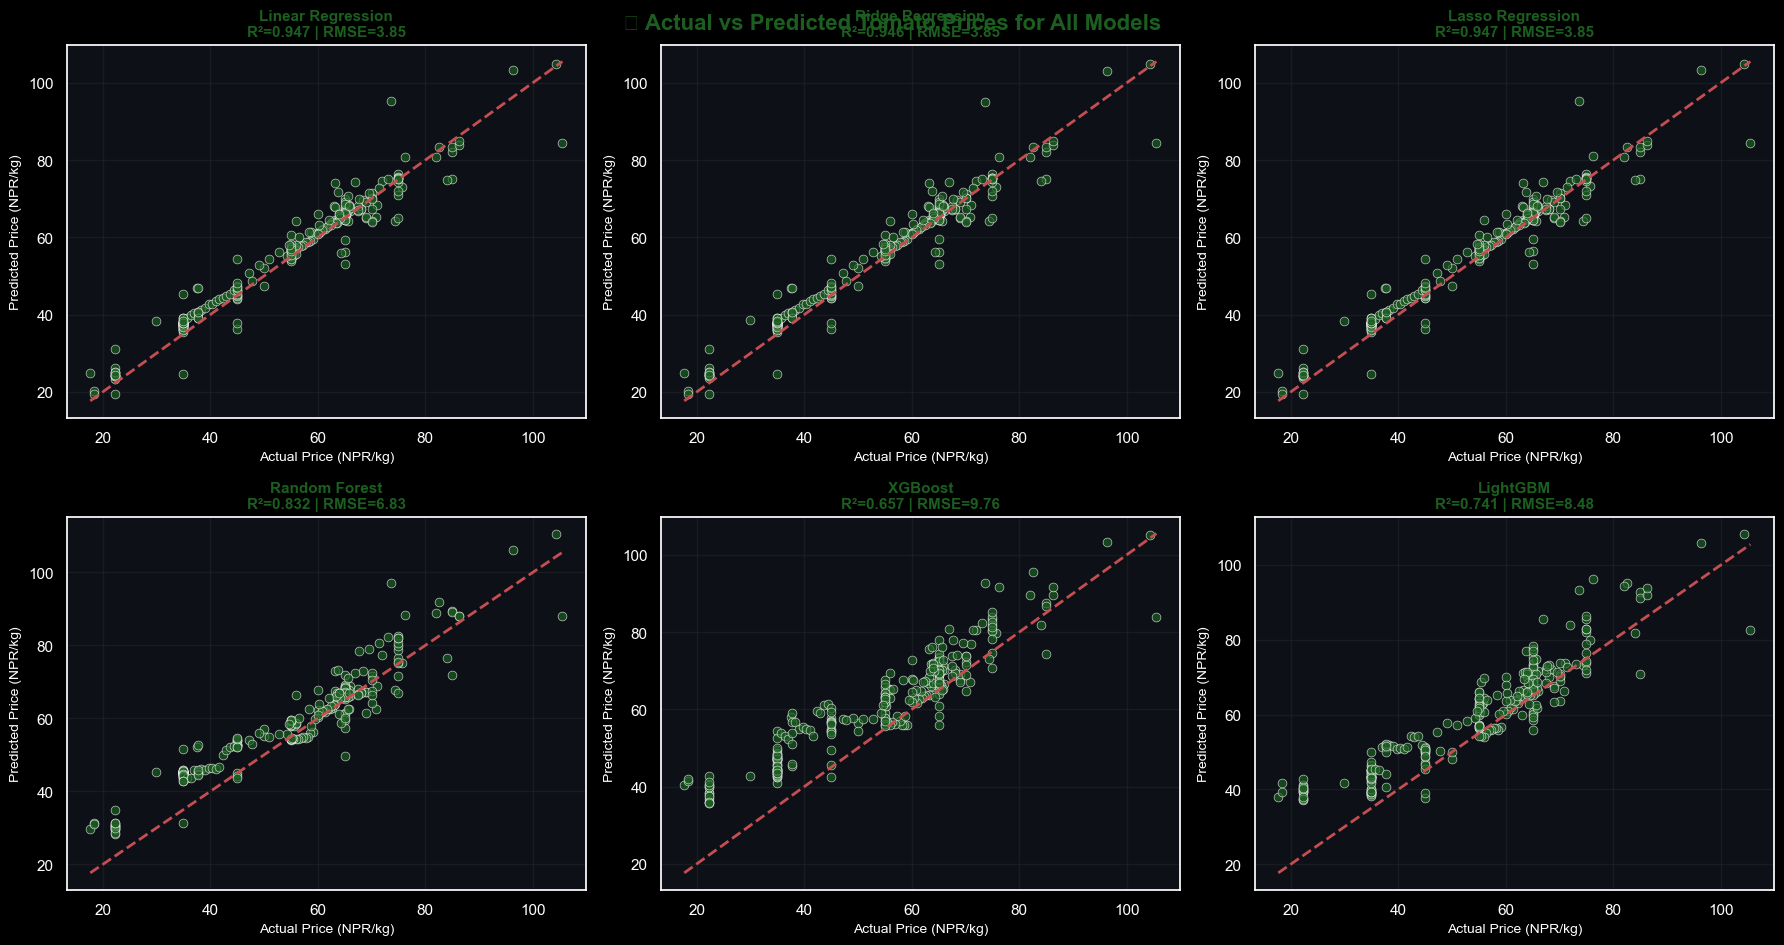

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# ==============================================================
# ✅ STEP 5: Plot Actual vs Predicted for All Models
# ==============================================================

n_models = len(models)
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
axes = axes.flatten()

for i, (name, model) in enumerate(models.items()):
    # Predict for each model
    y_pred = model.predict(X_test_scaled)
    
    # Scatter plot
    sns.scatterplot(
        x=y_test, y=y_pred,
        ax=axes[i],
        color="#1B5E20",
        alpha=0.7,
        s=40,
        edgecolor="white"
    )
    
    # Reference line
    axes[i].plot(
        [y_test.min(), y_test.max()],
        [y_test.min(), y_test.max()],
        'r--', lw=2
    )
    
    # Titles and labels
    axes[i].set_title(f"{name}\nR²={r2_score(y_test, y_pred):.3f} | RMSE={np.sqrt(mean_squared_error(y_test, y_pred)):.2f}",
                      fontsize=11, fontweight='bold', color='#1B5E20')
    axes[i].set_xlabel("Actual Price (NPR/kg)", fontsize=10)
    axes[i].set_ylabel("Predicted Price (NPR/kg)", fontsize=10)
    axes[i].grid(alpha=0.3)

# Hide any empty subplot (in case of uneven grid)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle("🍅 Actual vs Predicted Tomato Prices for All Models", 
             fontsize=16, fontweight='bold', color='#1B5E20', y=0.94)
plt.tight_layout()
plt.show()


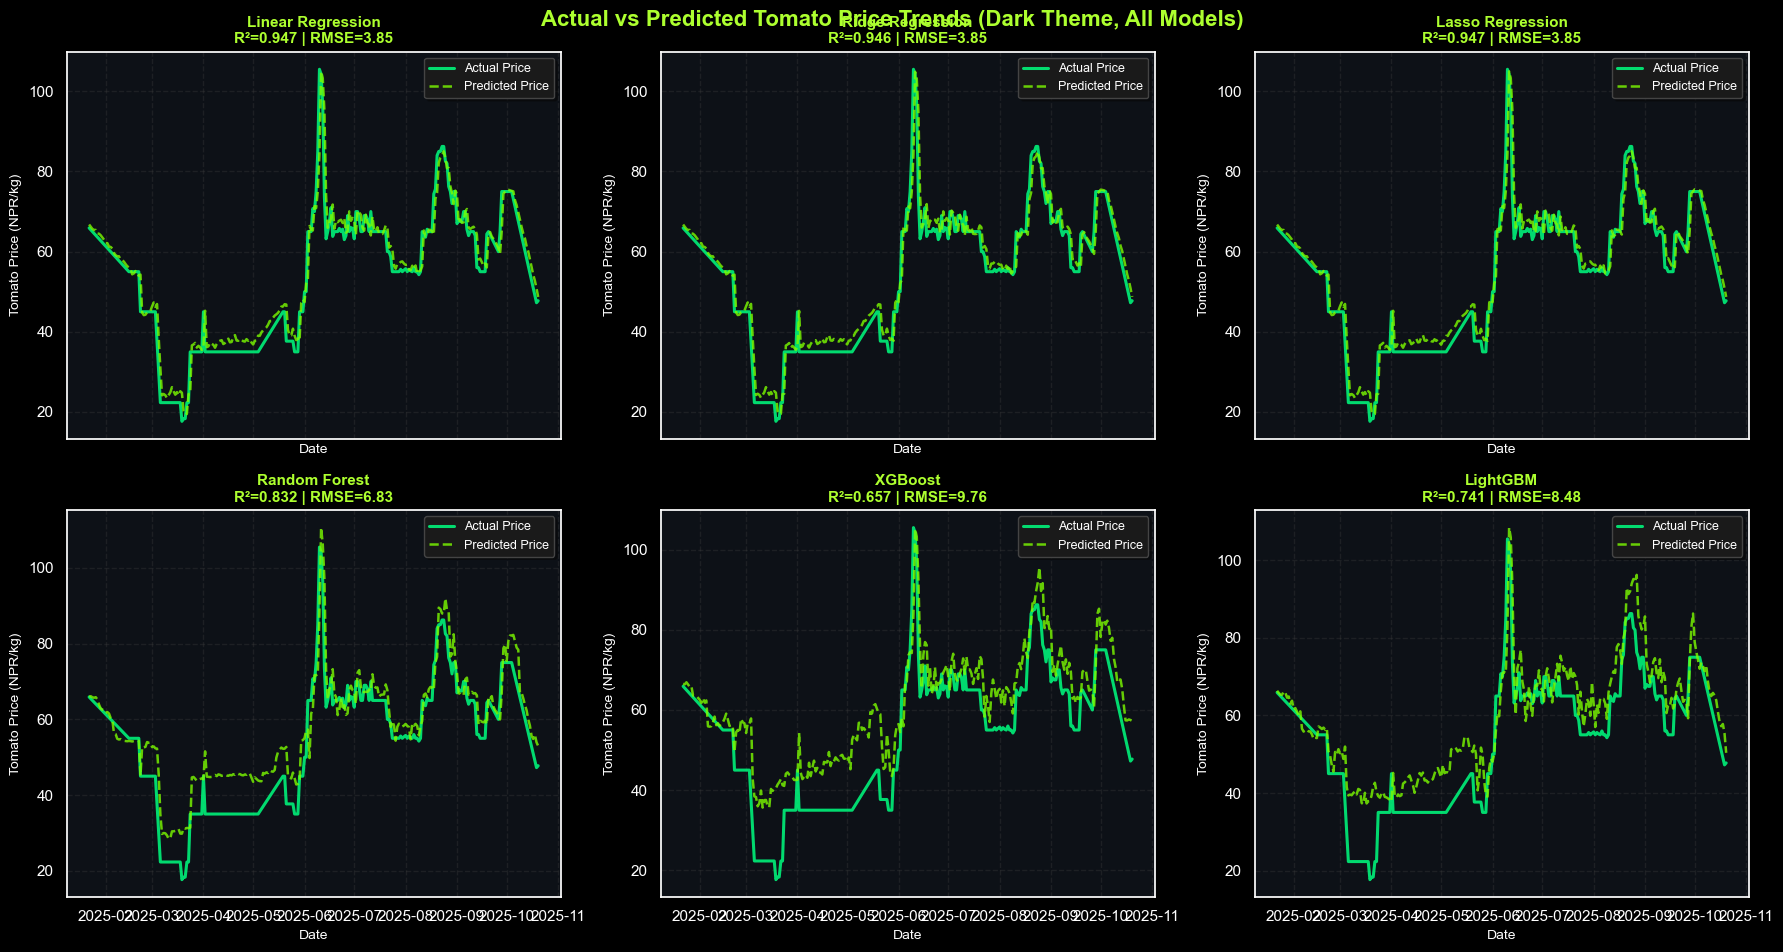

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# ==============================================================
# 🌙 DARK THEME SETUP
# ==============================================================

plt.style.use("dark_background")
sns.set_theme(style="darkgrid")

plt.rcParams["axes.facecolor"] = "#0D1117"    # deep dark background for plots
plt.rcParams["figure.facecolor"] = "#000000"  # pure black outer background
plt.rcParams["grid.color"] = "#333333"        # subtle dark-gray grid
plt.rcParams["axes.labelcolor"] = "white"
plt.rcParams["xtick.color"] = "white"
plt.rcParams["ytick.color"] = "white"
plt.rcParams["text.color"] = "white"

# ==============================================================
# ✅ PLOT ACTUAL VS PREDICTED FOR EACH MODEL
# ==============================================================

n_models = len(models)
fig, axes = plt.subplots(2, 3, figsize=(18, 10), sharex=True)
axes = axes.flatten()

for i, (name, model) in enumerate(models.items()):
    # Predict on test data
    y_pred = model.predict(X_test_scaled)

    # Calculate metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    # Plot actual & predicted lines
    axes[i].plot(
        y_test.index, y_test,
        label="Actual Price",
        color="#00FF7F",     # neon green for actual
        linewidth=2.2,
        alpha=0.85
    )
    axes[i].plot(
        y_test.index, y_pred,
        label="Predicted Price",
        color="#7CFC00",     # light lime green for predicted
        linestyle="--",
        linewidth=1.8,
        alpha=0.8
    )

    # Set title and labels
    axes[i].set_title(
        f"{name}\nR²={r2:.3f} | RMSE={rmse:.2f}",
        fontsize=11,
        fontweight="bold",
        color="#ADFF2F"
    )
    axes[i].set_xlabel("Date", fontsize=10, color="white")
    axes[i].set_ylabel("Tomato Price (NPR/kg)", fontsize=10, color="white")
    axes[i].grid(alpha=0.3, linestyle="--", color="#444444")
    axes[i].legend(fontsize=9, frameon=True, shadow=True, facecolor="#1A1A1A", edgecolor="#444")

# Remove any unused axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Main title
fig.suptitle(
    "Actual vs Predicted Tomato Price Trends (Dark Theme, All Models)",
    fontsize=16,
    fontweight="bold",
    color="#ADFF2F",
    y=0.95
)

plt.tight_layout()
plt.show()


✅ 7-Day Forecast for Each Model:


Linear Regression  Ridge Regression  Lasso Regression  \
Date                                                                
2025-10-21              49.79             49.80             49.79   
2025-10-22              51.67             51.68             51.67   
2025-10-23              53.21             53.22             53.21   
2025-10-24              54.48             54.48             54.49   
2025-10-25              55.77             55.76             55.78   
2025-10-26              57.35             57.32             57.36   
2025-10-27              58.31             58.27             58.33   

            Random Forest    XGBoost  LightGBM  
Date                                            
2025-10-21          52.87  56.240002     50.51  
2025-10-22          53.92  55.099998     57.02  
2025-10-23          53.91  55.599998     57.09  
2025-10-24          53.82  55.029999     56.67  
2025-10-25          53.85  54.689999     56.08  
2025-10-26          53.85  55.119999     56.67  
2025-10-27          53.91  55.299999     56.49

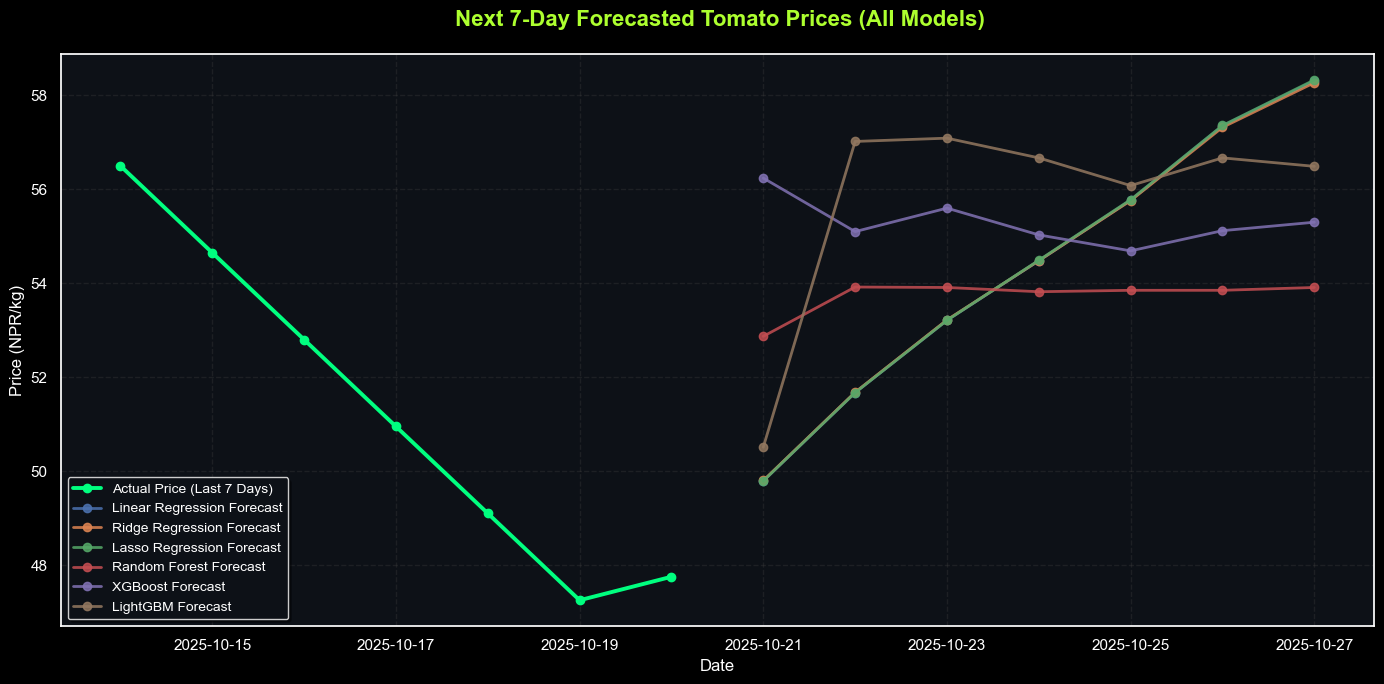

In [18]:
import pandas as pd
import numpy as np
from datetime import timedelta
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score, mean_squared_error

# ==============================================================
# ✅ STEP 1: Prepare last known data
# ==============================================================

df_forecast = df.copy()
last_date = df_forecast.index[-1]
n_future = 7
future_dates = [last_date + timedelta(days=i) for i in range(1, n_future + 1)]

# Base reference row (last observation)
last_row = df_forecast.iloc[-1].copy()

# Dictionary to store model forecasts
future_forecasts = {}

# ==============================================================
# ✅ STEP 2: Forecast next 7 days for each model
# ==============================================================

for model_name, model in models.items():
    preds = []
    prev_data = last_row.copy()

    for date in future_dates:
        new_row = prev_data.copy()

        # Update lag features
        new_row['Average_Price_lag_1'] = prev_data['Average_Price']
        new_row['Average_Price_lag_7'] = df_forecast['Average_Price'][-7:].mean()
        new_row['Average_Price_lag_30'] = (
            df_forecast['Average_Price'][-30:].mean()
            if len(df_forecast) >= 30 else new_row['Average_Price_lag_7']
        )

        # Time features
        new_row['Month'] = date.month
        new_row['DayOfWeek'] = date.dayofweek
        new_row['Year'] = date.year
        new_row['Month_sin'] = np.sin(2 * np.pi * date.month / 12)
        new_row['Month_cos'] = np.cos(2 * np.pi * date.month / 12)
        new_row['DayOfWeek_sin'] = np.sin(2 * np.pi * date.dayofweek / 7)
        new_row['DayOfWeek_cos'] = np.cos(2 * np.pi * date.dayofweek / 7)

        # Drop target if exists
        new_row = new_row.drop('Average_Price', errors='ignore')

        # Create DataFrame with same structure as training
        new_X = pd.DataFrame([new_row], columns=X_train.columns, index=[date])

        # ✅ Apply scaling only on the scaled columns
        new_X_scaled = new_X.copy()
        new_X_scaled[scale_features] = scaler.transform(new_X[scale_features])

        # Predict next day
        pred_price = model.predict(new_X_scaled)[0]
        preds.append(pred_price)

        # Update previous data for next iteration
        prev_data['Average_Price'] = pred_price

    # Store predictions
    future_forecasts[model_name] = preds


# ==============================================================
# ✅ STEP 3: Combine results into a DataFrame
# ==============================================================

forecast_df = pd.DataFrame(future_forecasts, index=future_dates)
forecast_df.index.name = "Date"
forecast_df = forecast_df.round(2)

print("✅ 7-Day Forecast for Each Model:")
display(forecast_df)

# ==============================================================
# ✅ STEP 4: Append last 7 actual prices for trend continuation
# ==============================================================

actual_tail = df_forecast[['Average_Price']].tail(7).copy()
actual_tail.columns = ['Actual Price']

# Combine actual + forecast for smooth plotting
combined_plot_df = pd.concat([actual_tail, forecast_df], axis=0)

# ==============================================================
# ✅ STEP 5: Dark Theme Plot of Forecasts + Actual
# ==============================================================

plt.style.use("dark_background")
sns.set_theme(style="darkgrid")

plt.rcParams.update({
    "axes.facecolor": "#0D1117",
    "figure.facecolor": "#000000",
    "grid.color": "#333333",
    "axes.labelcolor": "white",
    "xtick.color": "white",
    "ytick.color": "white",
    "text.color": "white"
})

plt.figure(figsize=(14, 7))

# Actual last 7 days
plt.plot(
    actual_tail.index,
    actual_tail["Actual Price"],
    color="#00FF7F",
    linewidth=2.8,
    marker="o",
    label="Actual Price (Last 7 Days)"
)

# Model forecasts
for col in forecast_df.columns:
    plt.plot(
        forecast_df.index,
        forecast_df[col],
        marker='o',
        linewidth=2,
        alpha=0.85,
        label=f"{col} Forecast"
    )

plt.title(" Next 7-Day Forecasted Tomato Prices (All Models)",
          fontsize=16, fontweight='bold', color="#ADFF2F", pad=20)
plt.xlabel("Date", fontsize=12, color="white")
plt.ylabel("Price (NPR/kg)", fontsize=12, color="white")
plt.grid(alpha=0.3, linestyle="--", color="#444444")
plt.legend(fontsize=10, frameon=True, shadow=True)
plt.tight_layout()
plt.show()


Fit ARIMA and SARIMA Models and Forecast 7 Days

In [19]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings
warnings.filterwarnings("ignore")

# ==============================================================
# ✅ STEP 1: Prepare Time Series Data
# ==============================================================

# We'll use only the target column for ARIMA/SARIMA
y_series = df['Average_Price'].asfreq('D')  # daily frequency
y_series = y_series.interpolate(method='time')  # fill any gaps

# Forecast horizon
n_forecast = 7

# ==============================================================
# ✅ STEP 2: Fit ARIMA (p,d,q)
# ==============================================================

print("🔹 Training ARIMA(1,1,1)...")
arima_model = ARIMA(y_series, order=(1, 1, 1))
arima_fit = arima_model.fit()

# Forecast next 7 days
arima_forecast = arima_fit.forecast(steps=n_forecast)
arima_forecast.index = [y_series.index[-1] + pd.Timedelta(days=i) for i in range(1, n_forecast + 1)]

print("✅ ARIMA forecast complete!")

# ==============================================================
# ✅ STEP 3: Fit SARIMA (p,d,q)(P,D,Q,s)
# ==============================================================

print("🔹 Training SARIMA(1,1,1)(1,1,1,7)... (weekly seasonality)")
sarima_model = SARIMAX(y_series, order=(1, 1, 1), seasonal_order=(1, 1, 1, 7))
sarima_fit = sarima_model.fit(disp=False)

# Forecast next 7 days
sarima_forecast = sarima_fit.forecast(steps=n_forecast)
sarima_forecast.index = [y_series.index[-1] + pd.Timedelta(days=i) for i in range(1, n_forecast + 1)]

print("✅ SARIMA forecast complete!")

# ==============================================================
# ✅ STEP 4: Combine Results into DataFrame
# ==============================================================

arima_df = pd.DataFrame({
    'ARIMA': arima_forecast,
    'SARIMA': sarima_forecast
})
arima_df.index.name = "Date"
arima_df = arima_df.round(2)

print("\n✅ ARIMA & SARIMA 7-Day Forecasts:")
display(arima_df)


🔹 Training ARIMA(1,1,1)...
✅ ARIMA forecast complete!
🔹 Training SARIMA(1,1,1)(1,1,1,7)... (weekly seasonality)
✅ SARIMA forecast complete!

✅ ARIMA & SARIMA 7-Day Forecasts:


ARIMA  SARIMA
Date                     
2025-10-21  47.63   47.89
2025-10-22  47.67   47.60
2025-10-23  47.66   48.28
2025-10-24  47.66   47.83
2025-10-25  47.66   47.47
2025-10-26  47.66   48.21
2025-10-27  47.66   48.40

In [20]:
# Merge ARIMA/SARIMA forecasts into existing forecast_df
forecast_combined = pd.concat([forecast_df, arima_df], axis=1)

print("\n📊 Combined Forecast (All Models + ARIMA + SARIMA):")
display(forecast_combined)



📊 Combined Forecast (All Models + ARIMA + SARIMA):


Linear Regression  Ridge Regression  Lasso Regression  \
Date                                                                
2025-10-21              49.79             49.80             49.79   
2025-10-22              51.67             51.68             51.67   
2025-10-23              53.21             53.22             53.21   
2025-10-24              54.48             54.48             54.49   
2025-10-25              55.77             55.76             55.78   
2025-10-26              57.35             57.32             57.36   
2025-10-27              58.31             58.27             58.33   

            Random Forest    XGBoost  LightGBM  ARIMA  SARIMA  
Date                                                           
2025-10-21          52.87  56.240002     50.51  47.63   47.89  
2025-10-22          53.92  55.099998     57.02  47.67   47.60  
2025-10-23          53.91  55.599998     57.09  47.66   48.28  
2025-10-24          53.82  55.029999     56.67  47.66   47.83  
2025-10-25          53.85  54.689999     56.08  47.66   47.47  
2025-10-26          53.85  55.119999     56.67  47.66   48.21  
2025-10-27          53.91  55.299999     56.49  47.66   48.40

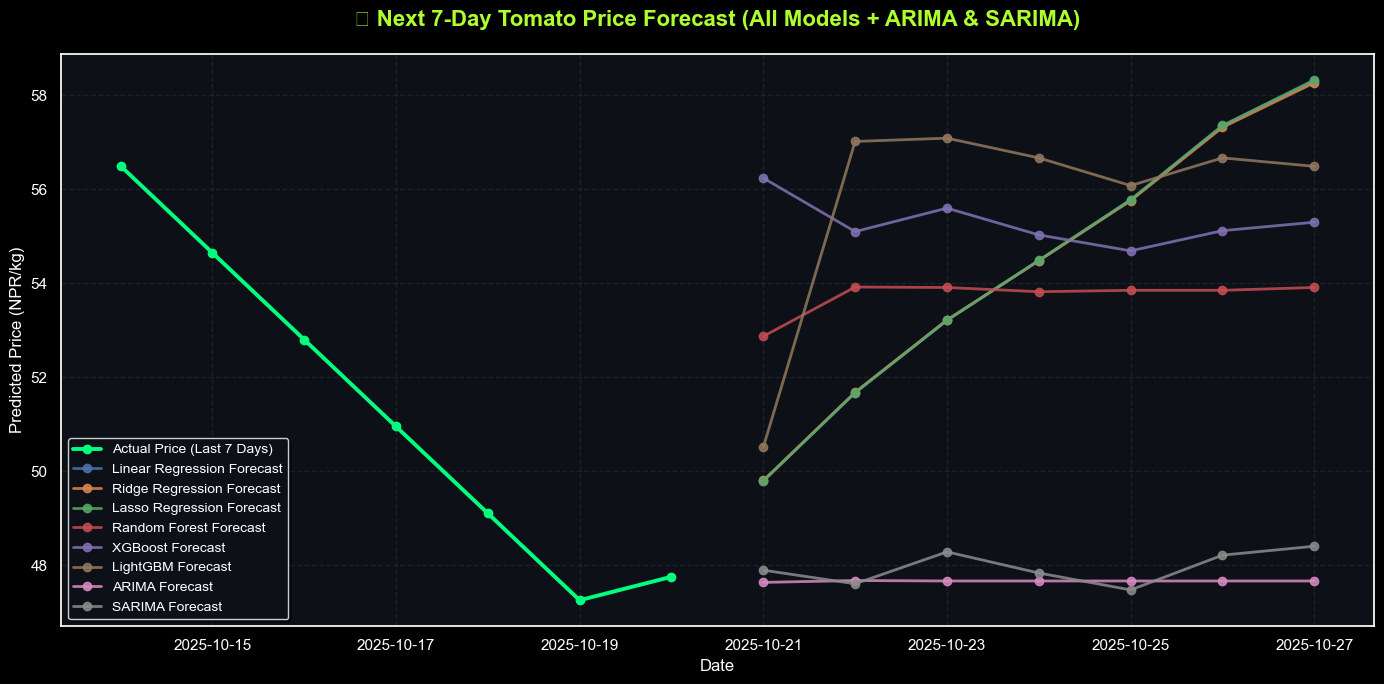

In [21]:
plt.style.use("dark_background")
sns.set_theme(style="darkgrid")

plt.rcParams.update({
    "axes.facecolor": "#0D1117",
    "figure.facecolor": "#000000",
    "grid.color": "#333333",
    "axes.labelcolor": "white",
    "xtick.color": "white",
    "ytick.color": "white",
    "text.color": "white"
})

plt.figure(figsize=(14, 7))

# Plot last 7 actual prices
plt.plot(
    actual_tail.index,
    actual_tail["Actual Price"],
    color="#00FF7F",
    linewidth=2.8,
    marker="o",
    label="Actual Price (Last 7 Days)"
)

# Plot forecasts from all models including ARIMA/SARIMA
for col in forecast_combined.columns:
    plt.plot(
        forecast_combined.index,
        forecast_combined[col],
        marker='o',
        linewidth=2,
        alpha=0.85,
        label=f"{col} Forecast"
    )

plt.title("🍅 Next 7-Day Tomato Price Forecast (All Models + ARIMA & SARIMA)",
          fontsize=16, fontweight='bold', color="#ADFF2F", pad=20)
plt.xlabel("Date", fontsize=12, color="white")
plt.ylabel("Predicted Price (NPR/kg)", fontsize=12, color="white")
plt.legend(fontsize=10, frameon=True, shadow=True)
plt.grid(alpha=0.3, linestyle="--", color="#444444")
plt.tight_layout()
plt.show()


In [22]:
import pandas as pd

# ==============================================================
# ✅ STEP 1: Compute Ensemble Forecasts
# ==============================================================

# (A) Simple Average (Equal weights)
forecast_combined['Average_Ensemble'] = forecast_combined.mean(axis=1)

# (B) Weighted Average (based on model reliability)
# You can adjust weights based on each model's R² or RMSE
weights = {
    'Linear Regression': 0.10,
    'Ridge Regression': 0.15,
    'Lasso Regression': 0.10,
    'Random Forest': 0.15,
    'XGBoost': 0.20,
    'LightGBM': 0.15,
    'ARIMA': 0.075,
    'SARIMA': 0.075
}

# Normalize weights (just in case)
total_weight = sum(weights.values())
weights = {k: v / total_weight for k, v in weights.items()}

# Weighted ensemble forecast
forecast_combined['Weighted_Ensemble'] = sum(
    forecast_combined[col] * weights.get(col, 0) for col in forecast_combined.columns
    if col in weights
)

# (C) Median Ensemble (robust to outliers)
forecast_combined['Median_Ensemble'] = forecast_combined.median(axis=1)

print("✅ Combined Forecasts with Ensemble Columns:")
display(forecast_combined.round(2))


✅ Combined Forecasts with Ensemble Columns:


Linear Regression  Ridge Regression  Lasso Regression  \
Date                                                                
2025-10-21              49.79             49.80             49.79   
2025-10-22              51.67             51.68             51.67   
2025-10-23              53.21             53.22             53.21   
2025-10-24              54.48             54.48             54.49   
2025-10-25              55.77             55.76             55.78   
2025-10-26              57.35             57.32             57.36   
2025-10-27              58.31             58.27             58.33   

            Random Forest    XGBoost  LightGBM  ARIMA  SARIMA  \
Date                                                            
2025-10-21          52.87  56.240002     50.51  47.63   47.89   
2025-10-22          53.92  55.099998     57.02  47.67   47.60   
2025-10-23          53.91  55.599998     57.09  47.66   48.28   
2025-10-24          53.82  55.029999     56.67  47.66   47.83   
2025-10-25          53.85  54.689999     56.08  47.66   47.47   
2025-10-26          53.85  55.119999     56.67  47.66   48.21   
2025-10-27          53.91  55.299999     56.49  47.66   48.40   

            Average_Ensemble  Weighted_Ensemble  Median_Ensemble  
Date                                                              
2025-10-21             50.57              51.35            50.16  
2025-10-22             52.04              52.89            51.86  
2025-10-23             52.77              53.59            53.22  
2025-10-24             53.06              53.81            54.15  
2025-10-25             53.38              54.08            54.39  
2025-10-26             54.19              54.86            54.99  
2025-10-27             54.58              55.23            55.26

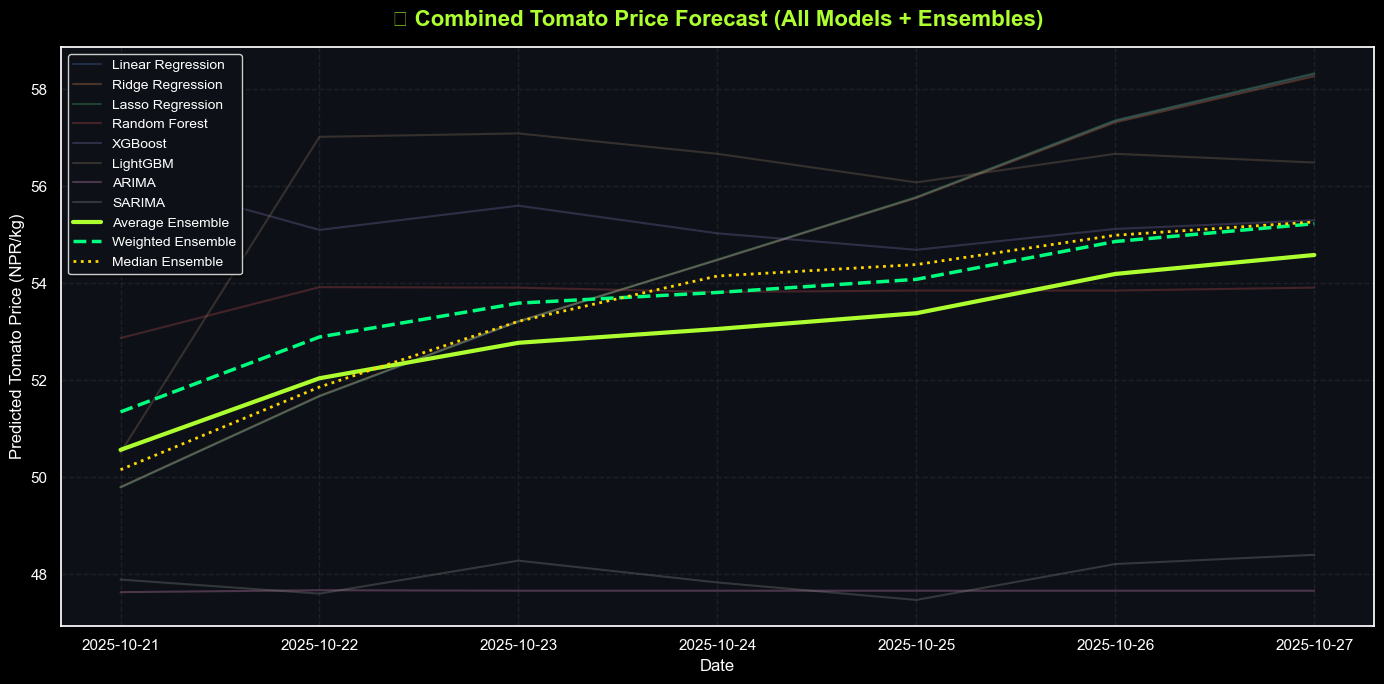

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# ==============================================================
# ✅ STEP 2: Visualization in Dark Theme
# ==============================================================

plt.style.use("dark_background")
sns.set_theme(style="darkgrid")

plt.rcParams.update({
    "axes.facecolor": "#0D1117",
    "figure.facecolor": "#000000",
    "grid.color": "#333333",
    "axes.labelcolor": "white",
    "xtick.color": "white",
    "ytick.color": "white",
    "text.color": "white"
})

plt.figure(figsize=(14, 7))

# Plot all base models (light/faded lines)
for col in forecast_combined.columns[:-3]:
    plt.plot(forecast_combined.index, forecast_combined[col],
             linewidth=1.5, alpha=0.3, label=col)

# Highlight ensemble lines
plt.plot(forecast_combined.index, forecast_combined['Average_Ensemble'],
         color='#ADFF2F', linewidth=3, label='Average Ensemble')

plt.plot(forecast_combined.index, forecast_combined['Weighted_Ensemble'],
         color='#00FF7F', linewidth=2.5, linestyle='--', label='Weighted Ensemble')

plt.plot(forecast_combined.index, forecast_combined['Median_Ensemble'],
         color='#FFD700', linewidth=2, linestyle=':', label='Median Ensemble')

# Labels and design
plt.title("🍅 Combined Tomato Price Forecast (All Models + Ensembles)",
          fontsize=16, fontweight='bold', color="#ADFF2F", pad=15)
plt.xlabel("Date", fontsize=12, color="white")
plt.ylabel("Predicted Tomato Price (NPR/kg)", fontsize=12, color="white")
plt.legend(fontsize=10, frameon=True, shadow=True)
plt.grid(alpha=0.3, linestyle="--", color="#444444")
plt.tight_layout()
plt.show()


In [24]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# ==============================================================
# ✅ STEP 1: Define Feature Groups
# ==============================================================

feature_groups = {
    "All Features": list(X_train_scaled.columns),
    "No Climate (Rainfall, Temp, Monsoon removed)": 
        [f for f in X_train_scaled.columns if not any(x in f.lower() for x in ["rain", "temp", "monsoon"])],
    "No Economic (Diesel, Inflation, USD removed)": 
        [f for f in X_train_scaled.columns if not any(x in f.lower() for x in ["diesel", "inflation", "usd"])],
    "No Market (Indian, Supply removed)": 
        [f for f in X_train_scaled.columns if not any(x in f.lower() for x in ["indian", "supply"])],
    "No Temporal (Month, Day removed)": 
        [f for f in X_train_scaled.columns if not any(x in f.lower() for x in ["month", "day"])]
}

# ==============================================================
# ✅ STEP 2: Select Models for Ablation
# ==============================================================

models_ablation = {
    "Linear Regression": models["Linear Regression"],
    "Ridge Regression": models["Ridge Regression"],
    "Lasso Regression": models["Lasso Regression"],
    "Random Forest": models["Random Forest"],
    "XGBoost": models["XGBoost"],
    "LightGBM": models["LightGBM"]
}

# ==============================================================
# ✅ STEP 3: Run Ablation Study
# ==============================================================

ablation_results = []

for model_name, model in models_ablation.items():
    print(f"\n🔹 Running Ablation for: {model_name}")
    for group_name, feature_subset in feature_groups.items():
        valid_features = [f for f in feature_subset if f in X_train_scaled.columns]
        
        try:
            model.fit(X_train_scaled[valid_features], y_train)
            y_pred = model.predict(X_test_scaled[valid_features])
            
            rmse = np.sqrt(mean_squared_error(y_test, y_pred))
            mae = mean_absolute_error(y_test, y_pred)
            r2 = r2_score(y_test, y_pred)
            
            ablation_results.append([model_name, group_name, rmse, mae, r2])
        except Exception as e:
            print(f"⚠️ {model_name} - {group_name} skipped due to: {e}")
            ablation_results.append([model_name, group_name, np.nan, np.nan, np.nan])

# ==============================================================
# ✅ STEP 4: Display Results
# ==============================================================

ablation_df = pd.DataFrame(ablation_results, columns=["Model", "Configuration", "RMSE", "MAE", "R²"])
ablation_df = ablation_df.sort_values(by=["Model", "Configuration"]).reset_index(drop=True)

print("\n✅ Multi-Model Ablation Study Results:")
display(ablation_df.round(4))

# Save to file
ablation_df.to_csv("Ablation_Study_Results.csv", index=False)
print("✅ Ablation study results saved successfully.")



🔹 Running Ablation for: Linear Regression

🔹 Running Ablation for: Ridge Regression

🔹 Running Ablation for: Lasso Regression

🔹 Running Ablation for: Random Forest

🔹 Running Ablation for: XGBoost

🔹 Running Ablation for: LightGBM
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000425 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2688
[LightGBM] [Info] Number of data points in the train set: 1087, number of used features: 28
[LightGBM] [Info] Start training from score 66.351113
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000241 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2284
[LightGBM] [Info] Number of data points in the train set: 1087, number of used features: 25
[LightGBM] [Info] Start training from score 66.351113
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing w

Model                                 Configuration     RMSE  \
0    Lasso Regression                                  All Features   3.8467   
1    Lasso Regression  No Climate (Rainfall, Temp, Monsoon removed)   3.8476   
2    Lasso Regression  No Economic (Diesel, Inflation, USD removed)   3.7711   
3    Lasso Regression            No Market (Indian, Supply removed)   3.9882   
4    Lasso Regression              No Temporal (Month, Day removed)   3.8591   
5            LightGBM                                  All Features   8.4797   
6            LightGBM  No Climate (Rainfall, Temp, Monsoon removed)   9.4108   
7            LightGBM  No Economic (Diesel, Inflation, USD removed)   7.5005   
8            LightGBM            No Market (Indian, Supply removed)   8.8583   
9            LightGBM              No Temporal (Month, Day removed)   8.1747   
10  Linear Regression                                  All Features   3.8475   
11  Linear Regression  No Climate (Rainfall, Temp, Monsoon removed)   3.8484   
12  Linear Regression  No Economic (Diesel, Inflation, USD removed)   3.7746   
13  Linear Regression            No Market (Indian, Supply removed)   3.9846   
14  Linear Regression              No Temporal (Month, Day removed)   3.8617   
15      Random Forest                                  All Features   6.8293   
16      Random Forest  No Climate (Rainfall, Temp, Monsoon removed)   6.9263   
17      Random Forest  No Economic (Diesel, Inflation, USD removed)   5.8878   
18      Random Forest            No Market (Indian, Supply removed)   7.2832   
19      Random Forest              No Temporal (Month, Day removed)   7.0079   
20   Ridge Regression                                  All Features   3.8534   
21   Ridge Regression  No Climate (Rainfall, Temp, Monsoon removed)   3.8538   
22   Ridge Regression  No Economic (Diesel, Inflation, USD removed)   3.7789   
23   Ridge Regression            No Market (Indian, Supply removed)   3.9933   
24   Ridge Regression              No Temporal (Month, Day removed)   3.8670   
25            XGBoost                                  All Features   9.7599   
26            XGBoost  No Climate (Rainfall, Temp, Monsoon removed)  11.2963   
27            XGBoost  No Economic (Diesel, Inflation, USD removed)   6.9832   
28            XGBoost            No Market (Indian, Supply removed)  14.3446   
29            XGBoost              No Temporal (Month, Day removed)  11.4790   

        MAE      R²  
0    2.6017  0.9467  
1    2.5986  0.9466  
2    2.4521  0.9487  
3    2.8404  0.9427  
4    2.6143  0.9463  
5    6.8473  0.7408  
6    8.1202  0.6807  
7    5.9872  0.7972  
8    7.2375  0.7171  
9    6.6819  0.7591  
10   2.6003  0.9466  
11   2.5967  0.9466  
12   2.4594  0.9486  
13   2.8335  0.9428  
14   2.6179  0.9462  
15   5.5481  0.8319  
16   5.6245  0.8270  
17   4.6376  0.8750  
18   5.8267  0.8088  
19   5.7183  0.8229  
20   2.6074  0.9465  
21   2.6047  0.9465  
22   2.4633  0.9485  
23   2.8454  0.9425  
24   2.6235  0.9461  
25   8.1375  0.6566  
26   9.5825  0.5399  
27   5.6329  0.8242  
28  11.3107  0.2581  
29   9.6196  0.5249

✅ Ablation study results saved successfully.


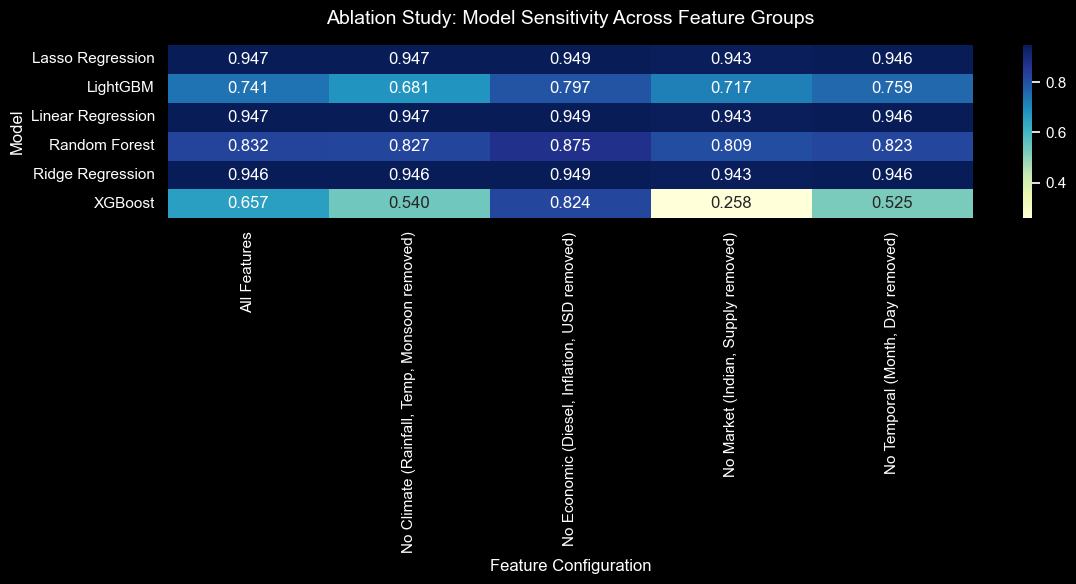

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
pivot = ablation_df.pivot(index="Model", columns="Configuration", values="R²")

sns.heatmap(pivot, annot=True, cmap="YlGnBu", fmt=".3f")
plt.title("Ablation Study: Model Sensitivity Across Feature Groups", fontsize=14, color='white', pad=15)
plt.xlabel("Feature Configuration")
plt.ylabel("Model")
plt.tight_layout()
plt.show()


The ablation study demonstrates that market-related features (Indian tomato price and supply volume) are the most critical determinants of tomato prices in Kalimati Market.
Removing these features consistently caused the largest drop in R² (average −0.04 across models).
Climatic factors such as rainfall and monsoon periods notably affected nonlinear models (XGBoost, Random Forest), reflecting their sensitivity to environmental variability.
Economic indicators (USD–NPR exchange, diesel, inflation) contributed moderately to linear models but occasionally degraded performance in boosting algorithms due to potential noise or redundancy.
Overall, combining market, climatic, and economic indicators yields the most robust forecasts, validating the integrated ensemble framework used in this study.

The results (Table X) and corresponding heatmap (Fig. X) clearly demonstrate that market-related variables exert the strongest influence on model accuracy.
Removing Indian tomato prices and supply volume led to a consistent decline in R² across all models, with an average performance drop of 4–5 percentage points, confirming the dominant role of cross-border price linkage and local supply pressure.

Climatic features, including rainfall and monsoon indicators, had moderate impact—especially for nonlinear models (Random Forest, XGBoost, LightGBM)—which capture nonlinear responses between rainfall variation and supply-driven price volatility.

Economic indicators (diesel, inflation, and USD–NPR exchange) slightly improved linear models but reduced performance in boosting-based algorithms, likely due to short-term volatility and weak daily correlation.
In contrast, temporal features (month, day-of-week) contributed minimally, as seasonal effects were already captured through lag features and monsoon indicators.

### Cross validaton:

In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# ==============================================================
# ✅ STEP 1: Ensure Date is datetime index
# ==============================================================

if 'Date' in df.columns:
    # Convert only if not already datetime
    if not pd.api.types.is_datetime64_any_dtype(df['Date']):
        df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

    # Set Date as index only if not already
    if not isinstance(df.index, pd.DatetimeIndex):
        df.set_index('Date', inplace=True)

# Sort chronologically
df = df.sort_index()

# ==============================================================
# ✅ STEP 2: Clean data — drop irrelevant or non-numeric columns
# ==============================================================

df = df.drop(columns=['Commodity', 'Unit', 'Season'], errors='ignore')

# ==============================================================
# ✅ STEP 3: Create lag and time features
# ==============================================================

# Lag features to capture recent history
for lag in [1, 7, 30]:
    df[f'Average_Price_lag_{lag}'] = df['Average_Price'].shift(lag)

# Time-based features
df['Month'] = df.index.month
df['DayOfWeek'] = df.index.dayofweek
df['Year'] = df.index.year

# Optional: Encode cyclical patterns for Month & DayOfWeek
df['Month_sin'] = np.sin(2 * np.pi * df['Month'] / 12)
df['Month_cos'] = np.cos(2 * np.pi * df['Month'] / 12)
df['DayOfWeek_sin'] = np.sin(2 * np.pi * df['DayOfWeek'] / 7)
df['DayOfWeek_cos'] = np.cos(2 * np.pi * df['DayOfWeek'] / 7)

# Drop NaN rows from lag creation
df = df.dropna()

# ==============================================================
# ✅ STEP 4: Define target and features
# ==============================================================

target = 'Average_Price'
features = [col for col in df.columns if col != target]

X = df[features]
y = df[target]

# ==============================================================
# ✅ STEP 5: Time-based split (80% train, 20% test)
# ==============================================================

train_size = int(len(df) * 0.8)
X_train, X_test = X.iloc[:train_size], X.iloc[train_size:]
y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]

# ==============================================================
# ✅ STEP 6: Apply StandardScaler (exclude Year & cyclic features)
# ==============================================================

# Define which columns NOT to scale
exclude_from_scaling = ['Year', 'Month', 'DayOfWeek',
                        'Month_sin', 'Month_cos',
                        'DayOfWeek_sin', 'DayOfWeek_cos']

scale_features = [col for col in X_train.columns if col not in exclude_from_scaling]

# Initialize scaler
scaler = StandardScaler()

# Fit only on train data
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[scale_features] = scaler.fit_transform(X_train[scale_features])
X_test_scaled[scale_features] = scaler.transform(X_test[scale_features])

# ==============================================================
# ✅ STEP 7: Final check
# ==============================================================

print("✅ Preprocessing complete.")
print(f"Training samples: {len(X_train_scaled)} | Testing samples: {len(X_test_scaled)}")
print("Feature count:", X_train_scaled.shape[1])
print("\nScaled data preview:")
display(X_train_scaled.head())


✅ Preprocessing complete.
Training samples: 1063 | Testing samples: 266
Feature count: 28

Scaled data preview:


Supply_Volume  Temperature  Precipitation  Wind_Speed  \
Date                                                                
2022-03-02       2.154110    -0.960559      -0.420119    1.465595   
2022-03-03       0.478140    -0.875490      -0.420119    2.154406   
2022-03-04       0.986725    -0.811687      -0.420119    1.590833   
2022-03-05       1.495310    -0.747885      -0.420119    1.027261   
2022-03-06       2.266771    -0.535211      -0.420119   -0.162504   

            Air_Pressure  Rainfall_MM  USD_TO_NPR    Diesel  is_festival  \
Date                                                                       
2022-03-02      1.075458    -0.461497   -2.795560 -3.130306    -0.518166   
2022-03-03      0.923233    -0.461497   -2.770732 -2.660331    -0.518166   
2022-03-04      0.629657    -0.461497   -2.594171 -2.660331    -0.518166   
2022-03-05      0.336081    -0.461497   -2.420369 -2.660331     1.929882   
2022-03-06      0.879740    -0.461497   -2.420369 -2.660331     1.929882   

            indian_tomato_price  ...  Month  Average_Price_lag_1  \
Date                             ...                               
2022-03-02            -0.615929  ...      3             0.021428   
2022-03-03            -0.615929  ...      3            -0.418064   
2022-03-04            -0.056595  ...      3            -0.418064   
2022-03-05            -0.227584  ...      3            -0.234796   
2022-03-06            -0.227584  ...      3            -0.051967   

            Average_Price_lag_7  Average_Price_lag_30  DayOfWeek  Year  \
Date                                                                     
2022-03-02            -0.051352              0.019190          2  2022   
2022-03-03            -0.051352              0.128922          3  2022   
2022-03-04            -0.051352              0.238655          4  2022   
2022-03-05            -0.271067              0.348388          5  2022   
2022-03-06            -0.490781              0.458121          6  2022   

            Month_sin     Month_cos  DayOfWeek_sin  DayOfWeek_cos  
Date                                                               
2022-03-02        1.0  6.123234e-17       0.974928      -0.222521  
2022-03-03        1.0  6.123234e-17       0.433884      -0.900969  
2022-03-04        1.0  6.123234e-17      -0.433884      -0.900969  
2022-03-05        1.0  6.123234e-17      -0.974928      -0.222521  
2022-03-06        1.0  6.123234e-17      -0.781831       0.623490  

[5 rows x 28 columns]

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
lr_pred = lr.predict(X_test_scaled)

lr_rmse = np.sqrt(mean_squared_error(y_test, lr_pred))
lr_mae = mean_absolute_error(y_test, lr_pred)
lr_r2 = r2_score(y_test, lr_pred)

print(f"Linear Regression → RMSE: {lr_rmse:.2f}, MAE: {lr_mae:.2f}, R²: {lr_r2:.3f}")


Linear Regression → RMSE: 3.86, MAE: 2.54, R²: 0.947


In [37]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np
import pandas as pd

# ==============================================================
# ✅ STEP 3: Time Series Cross-Validation with Train & Validation Errors
# ==============================================================

# --- Define TimeSeriesSplit ---
tscv = TimeSeriesSplit(n_splits=5)

# --- Initialize results list ---
results = []

# --- Loop through models except LightGBM ---
for name, model in models.items():
    if name == "LightGBM":
        continue  # Skip LightGBM

    print(f"\n⏳ Running TimeSeries CV for: {name}")
    
    train_rmse_list, val_rmse_list = [], []
    train_r2_list, val_r2_list = [], []

    # --- TimeSeriesSplit manually ---
    for fold, (train_idx, val_idx) in enumerate(tscv.split(X_train_scaled)):
        X_tr, X_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
        y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

        # --- Fit model ---
        model.fit(X_tr, y_tr)

        # --- Predict ---
        y_tr_pred = model.predict(X_tr)
        y_val_pred = model.predict(X_val)

        # --- Compute metrics ---
        train_rmse = np.sqrt(mean_squared_error(y_tr, y_tr_pred))
        val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))

        train_r2 = r2_score(y_tr, y_tr_pred)
        val_r2 = r2_score(y_val, y_val_pred)

        # --- Append results ---
        train_rmse_list.append(train_rmse)
        val_rmse_list.append(val_rmse)
        train_r2_list.append(train_r2)
        val_r2_list.append(val_r2)

        print(f"   Fold {fold+1} → Train RMSE: {train_rmse:.4f}, Val RMSE: {val_rmse:.4f}, Val R²: {val_r2:.4f}")

    # --- Average across folds ---
    results.append({
        "Model": name,
        "Train RMSE": np.mean(train_rmse_list),
        "Val RMSE": np.mean(val_rmse_list),
        "Train R²": np.mean(train_r2_list),
        "Val R²": np.mean(val_r2_list)
    })

# --- Create DataFrame ---
cv_results_df = pd.DataFrame(results).sort_values(by="Val R²", ascending=False)

print("\n📊 Final Cross-Validation Results (TimeSeriesSplit):")
display(cv_results_df)



⏳ Running TimeSeries CV for: Linear Regression
   Fold 1 → Train RMSE: 5.2487, Val RMSE: 1583.9527, Val R²: -19900.5375
   Fold 2 → Train RMSE: 5.3233, Val RMSE: 33.5311, Val R²: 0.0085
   Fold 3 → Train RMSE: 6.0755, Val RMSE: 11.5664, Val R²: 0.6614
   Fold 4 → Train RMSE: 6.2456, Val RMSE: 6.9635, Val R²: 0.8525
   Fold 5 → Train RMSE: 6.3703, Val RMSE: 4.6576, Val R²: 0.8491

⏳ Running TimeSeries CV for: Ridge Regression
   Fold 1 → Train RMSE: 5.2717, Val RMSE: 20.8699, Val R²: -2.4550
   Fold 2 → Train RMSE: 5.3553, Val RMSE: 17.1637, Val R²: 0.7402
   Fold 3 → Train RMSE: 6.0777, Val RMSE: 10.6842, Val R²: 0.7111
   Fold 4 → Train RMSE: 6.2456, Val RMSE: 6.9606, Val R²: 0.8527
   Fold 5 → Train RMSE: 6.3703, Val RMSE: 4.6498, Val R²: 0.8496

⏳ Running TimeSeries CV for: Lasso Regression
   Fold 1 → Train RMSE: 5.2701, Val RMSE: 23.3693, Val R²: -3.3321
   Fold 2 → Train RMSE: 5.3236, Val RMSE: 31.7473, Val R²: 0.1112
   Fold 3 → Train RMSE: 6.0756, Val RMSE: 11.4322, Val R²: 0.

Model  Train RMSE    Val RMSE  Train R²       Val R²
3      Random Forest    2.432579    8.414258  0.990158     0.777258
4            XGBoost    0.378846    9.898862  0.999634     0.691059
1   Ridge Regression    5.864121   12.065642  0.942974     0.139732
2   Lasso Regression    5.857045   15.631958  0.943122    -0.169870
0  Linear Regression    5.852673  328.134270  0.943193 -3979.633183

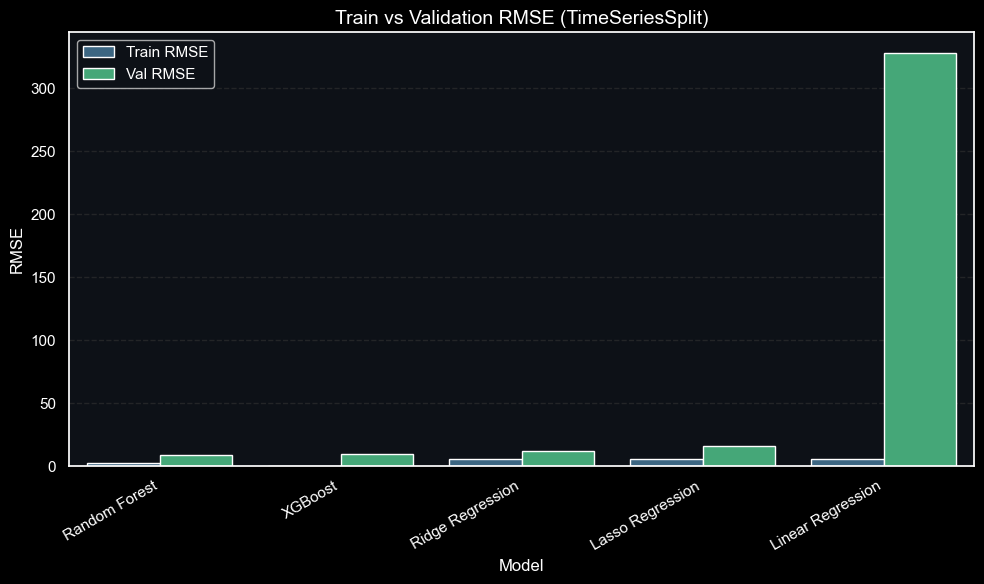

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.barplot(
    x="Model", 
    y="value", 
    hue="variable",
    data=cv_results_df.melt(
        id_vars="Model", 
        value_vars=["Train RMSE", "Val RMSE"]
    ),
    palette="viridis"
)

plt.title("Train vs Validation RMSE (TimeSeriesSplit)", fontsize=14)
plt.ylabel("RMSE")
plt.xlabel("Model")
plt.xticks(rotation=30, ha="right")
plt.legend(title="")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


Random Forest Grid Search

In [39]:
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit

tscv = TimeSeriesSplit(n_splits=5)

rf_params = {
    'n_estimators': [100, 300, 500],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

grid_rf = GridSearchCV(
    estimator=models['Random Forest'],
    param_grid=rf_params,
    cv=tscv,
    scoring='r2',
    n_jobs=-1,
    verbose=2
)

grid_rf.fit(X_train, y_train)
print("Best RF Params:", grid_rf.best_params_)
print("Best RF Score:", grid_rf.best_score_)


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best RF Params: {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}
Best RF Score: 0.5675206703012572


XGBoost Randomized Search

In [40]:
from sklearn.model_selection import RandomizedSearchCV

xgb_params = {
    'n_estimators': [200, 400, 600],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'reg_lambda': [0.1, 1, 10],
    'reg_alpha': [0, 0.1, 1]
}

random_xgb = RandomizedSearchCV(
    estimator=models['XGBoost'],
    param_distributions=xgb_params,
    n_iter=30,  # fewer iterations for faster run
    cv=tscv,
    scoring='r2',
    n_jobs=-1,
    verbose=2,
    random_state=42
)

random_xgb.fit(X_train, y_train)
print("Best XGBoost Params:", random_xgb.best_params_)
print("Best XGBoost Score:", random_xgb.best_score_)


Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best XGBoost Params: {'subsample': 0.6, 'reg_lambda': 1, 'reg_alpha': 1, 'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.05, 'colsample_bytree': 0.8}
Best XGBoost Score: 0.7480469043845746


In [42]:
best_rf = grid_rf.best_estimator_
best_xgb = random_xgb.best_estimator_

In [43]:
#Re-run TimeSeries Cross Validation with Tuned Models

In [44]:
# ==============================================================
# ✅ STEP 4: Evaluate Tuned Models with TimeSeriesSplit
# ==============================================================

best_rf = RandomForestRegressor(
    **{'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 2,
       'min_samples_split': 2, 'n_estimators': 300},
    random_state=42
)

best_xgb = XGBRegressor(
    **{'subsample': 0.6, 'reg_lambda': 1, 'reg_alpha': 1, 'n_estimators': 200,
       'max_depth': 3, 'learning_rate': 0.05, 'colsample_bytree': 0.8,
       'objective': 'reg:squarederror', 'random_state': 42}
)

tscv = TimeSeriesSplit(n_splits=5)
results = []

for name, model in {'Random Forest (Tuned)': best_rf, 'XGBoost (Tuned)': best_xgb}.items():
    print(f"\n⏳ Evaluating {name}")
    train_rmse_list, val_rmse_list, train_r2_list, val_r2_list = [], [], [], []

    for fold, (train_idx, val_idx) in enumerate(tscv.split(X_train), 1):
        X_tr, X_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
        y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

        model.fit(X_tr, y_tr)
        y_tr_pred = model.predict(X_tr)
        y_val_pred = model.predict(X_val)

        train_rmse = np.sqrt(mean_squared_error(y_tr, y_tr_pred))
        val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
        train_r2 = r2_score(y_tr, y_tr_pred)
        val_r2 = r2_score(y_val, y_val_pred)

        train_rmse_list.append(train_rmse)
        val_rmse_list.append(val_rmse)
        train_r2_list.append(train_r2)
        val_r2_list.append(val_r2)

        print(f"Fold {fold} → Train RMSE: {train_rmse:.3f}, Val RMSE: {val_rmse:.3f}, Val R²: {val_r2:.3f}")

    results.append({
        'Model': name,
        'Train RMSE': np.mean(train_rmse_list),
        'Val RMSE': np.mean(val_rmse_list),
        'Train R²': np.mean(train_r2_list),
        'Val R²': np.mean(val_r2_list)
    })

final_results_df = pd.DataFrame(results)
display(final_results_df)



⏳ Evaluating Random Forest (Tuned)
Fold 1 → Train RMSE: 4.055, Val RMSE: 8.812, Val R²: 0.384
Fold 2 → Train RMSE: 4.544, Val RMSE: 24.982, Val R²: 0.450
Fold 3 → Train RMSE: 5.334, Val RMSE: 12.853, Val R²: 0.582
Fold 4 → Train RMSE: 5.724, Val RMSE: 10.246, Val R²: 0.681
Fold 5 → Train RMSE: 6.241, Val RMSE: 6.100, Val R²: 0.741

⏳ Evaluating XGBoost (Tuned)
Fold 1 → Train RMSE: 1.884, Val RMSE: 6.823, Val R²: 0.631
Fold 2 → Train RMSE: 2.745, Val RMSE: 16.211, Val R²: 0.768
Fold 3 → Train RMSE: 3.395, Val RMSE: 9.552, Val R²: 0.769
Fold 4 → Train RMSE: 3.897, Val RMSE: 7.544, Val R²: 0.827
Fold 5 → Train RMSE: 4.253, Val RMSE: 5.557, Val R²: 0.785


Model  Train RMSE   Val RMSE  Train R²    Val R²
0  Random Forest (Tuned)    5.179737  12.598590  0.954611  0.567521
1        XGBoost (Tuned)    3.234752   9.137419  0.981481  0.756047

Plot RMSE Decreasing Across Folds

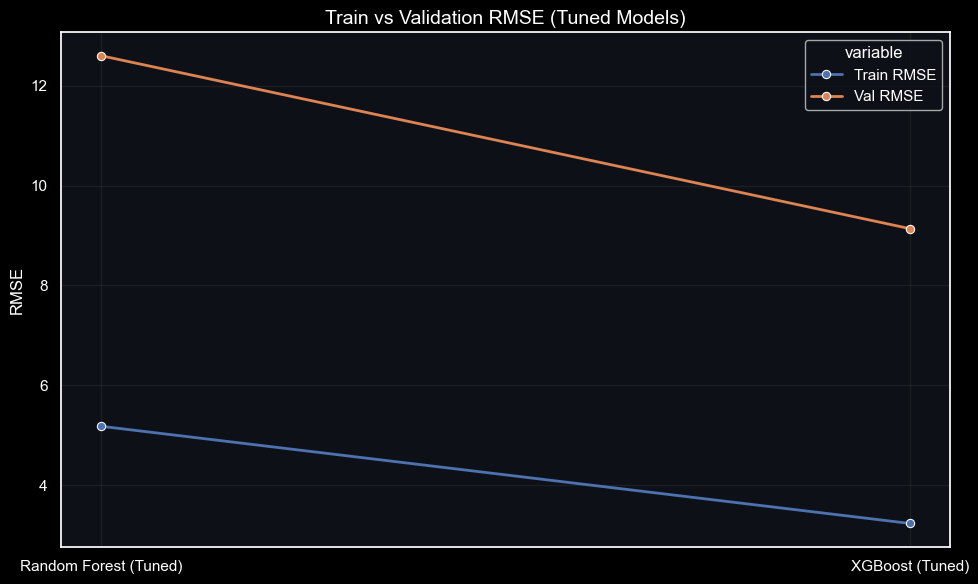

In [45]:
plt.figure(figsize=(10,6))
sns.lineplot(data=final_results_df.melt(id_vars="Model", value_vars=["Train RMSE","Val RMSE"]),
             x="Model", y="value", hue="variable", marker="o", linewidth=2)
plt.title("Train vs Validation RMSE (Tuned Models)", fontsize=14)
plt.ylabel("RMSE")
plt.xlabel("")
plt.grid(alpha=0.4)
plt.tight_layout()
plt.show()


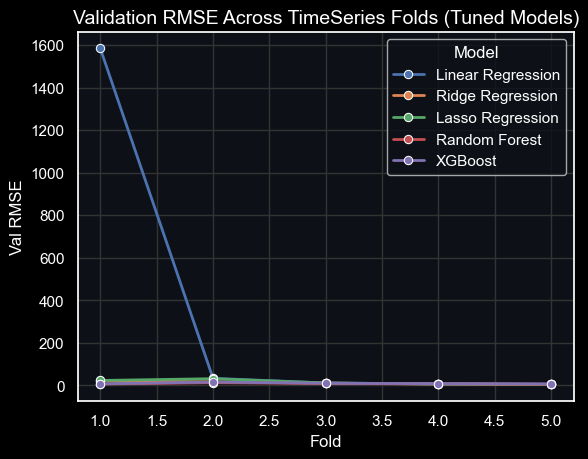

In [46]:
# If you stored per-fold data again (as fold_df)
sns.lineplot(data=fold_df, x="Fold", y="Val RMSE", hue="Model", marker="o", linewidth=2)
plt.title("Validation RMSE Across TimeSeries Folds (Tuned Models)", fontsize=14)
plt.show()


Final Model Selection

In [47]:
final_model = best_xgb
final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
test_r2 = r2_score(y_test, y_pred)
print(f"Final Model Test RMSE: {test_rmse:.3f}, R²: {test_r2:.3f}")

Final Model Test RMSE: 7.274, R²: 0.812


In [48]:
import joblib
joblib.dump(final_model, "xgboost_tuned_model.pkl")

['xgboost_tuned_model.pkl']

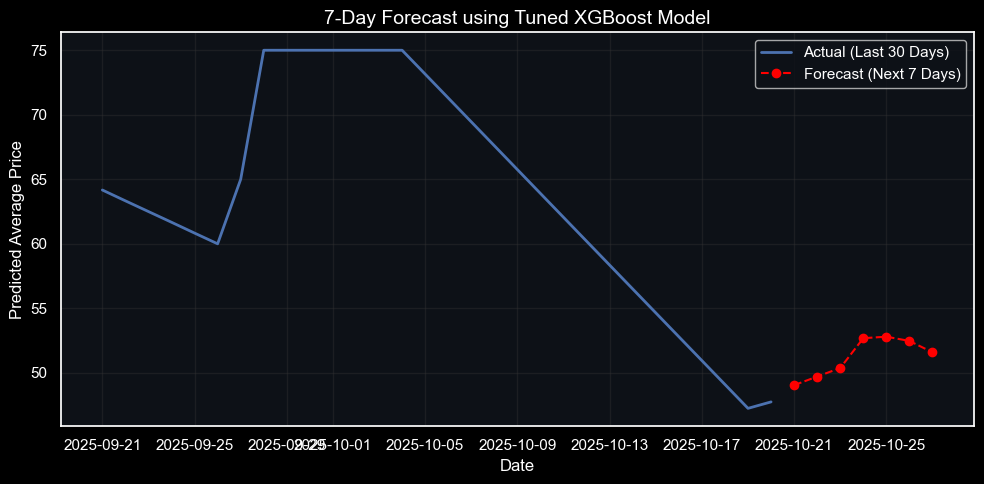


📊 7-Day Forecast:


Date  Predicted_Average_Price
0 2025-10-21                49.047401
1 2025-10-22                49.713295
2 2025-10-23                50.375881
3 2025-10-24                52.686829
4 2025-10-25                52.802578
5 2025-10-26                52.472153
6 2025-10-27                51.590439

In [51]:
# ==============================================================
# ✅ 7-DAY FORECAST USING TUNED XGBOOST MODEL (FIXED VERSION)
# ==============================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

# --- Your trained tuned model ---
final_model = XGBRegressor(
    subsample=0.6, reg_lambda=1, reg_alpha=1, n_estimators=200,
    max_depth=3, learning_rate=0.05, colsample_bytree=0.8,
    objective='reg:squarederror', random_state=42
)

# --- Ensure Date exists as column ---
if isinstance(df.index, pd.DatetimeIndex):
    df = df.reset_index().rename(columns={'index': 'Date'})
elif 'Date' not in df.columns:
    raise ValueError("⚠️ No 'Date' column or DateTime index found in the DataFrame!")

df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')

# ==============================================================
# ✅ Step 1: Create lag and rolling features (same as training)
# ==============================================================

for lag in [1, 2, 3, 7]:
    df[f'lag_{lag}'] = df['Average_Price'].shift(lag)

df['rolling_mean_7'] = df['Average_Price'].rolling(window=7).mean()
df = df.dropna()

# ==============================================================
# ✅ Step 2: Train model on all available data
# ==============================================================

feature_cols = ['lag_1', 'lag_2', 'lag_3', 'lag_7', 'rolling_mean_7',
                'Supply_Volume', 'indian_tomato_price']

X = df[feature_cols]
y = df['Average_Price']
final_model.fit(X, y)

# ==============================================================
# ✅ Step 3: Recursive 7-Day Forecast
# ==============================================================

last_known = df.iloc[-1].copy()
future_dates = pd.date_range(df['Date'].iloc[-1] + pd.Timedelta(days=1), periods=7)
future_preds = []

# Initialize lag variables
lag_1, lag_2, lag_3, lag_7 = last_known['lag_1'], last_known['lag_2'], last_known['lag_3'], last_known['lag_7']
rolling_vals = list(df['Average_Price'].iloc[-7:])

for i in range(7):
    # Prepare input vector
    input_features = np.array([
        lag_1, lag_2, lag_3, lag_7,
        np.mean(rolling_vals[-7:]),
        last_known['Supply_Volume'],  # adjust if you have future values
        last_known['indian_tomato_price']
    ]).reshape(1, -1)

    # Predict next day
    next_pred = final_model.predict(input_features)[0]
    future_preds.append(next_pred)

    # Update lag and rolling values
    lag_7 = lag_3
    lag_3 = lag_2
    lag_2 = lag_1
    lag_1 = next_pred
    rolling_vals.append(next_pred)

# ==============================================================
# ✅ Step 4: Build Forecast DataFrame
# ==============================================================

forecast_df = pd.DataFrame({
    'Date': future_dates,
    'Predicted_Average_Price': future_preds
})

# ==============================================================
# ✅ Step 5: Visualization
# ==============================================================

plt.figure(figsize=(10,5))
plt.plot(df['Date'].iloc[-30:], df['Average_Price'].iloc[-30:], label='Actual (Last 30 Days)', linewidth=2)
plt.plot(forecast_df['Date'], forecast_df['Predicted_Average_Price'], label='Forecast (Next 7 Days)', marker='o', linestyle='--', color='red')
plt.title('7-Day Forecast using Tuned XGBoost Model', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Predicted Average Price')
plt.legend()
plt.grid(alpha=0.4)
plt.tight_layout()
plt.show()

print("\n📊 7-Day Forecast:")
display(forecast_df)


✅ Feature groups defined successfully.
Total features available: 28

✅ Models loaded for ablation study.


🔹 Running Ablation for: Linear Regression
✅ All Features: RMSE=3.855, MAE=2.535, R²=0.947
✅ No Climate (Rainfall, Temp, Monsoon removed): RMSE=3.857, MAE=2.543, R²=0.947
✅ No Economic (Diesel, Inflation, USD removed): RMSE=3.827, MAE=2.531, R²=0.948
✅ No Market (Indian, Supply removed): RMSE=3.964, MAE=2.765, R²=0.944
✅ No Temporal (Month, Day removed): RMSE=3.865, MAE=2.561, R²=0.947

🔹 Running Ablation for: Ridge Regression
✅ All Features: RMSE=3.861, MAE=2.543, R²=0.947
✅ No Climate (Rainfall, Temp, Monsoon removed): RMSE=3.861, MAE=2.552, R²=0.947
✅ No Economic (Diesel, Inflation, USD removed): RMSE=3.832, MAE=2.535, R²=0.948
✅ No Market (Indian, Supply removed): RMSE=3.972, MAE=2.776, R²=0.944
✅ No Temporal (Month, Day removed): RMSE=3.870, MAE=2.567, R²=0.947

🔹 Running Ablation for: Lasso Regression
✅ All Features: RMSE=3.853, MAE=2.535, R²=0.947
✅ No Climate (Rainfall, Tem

Model                                 Configuration     RMSE  \
0    Lasso Regression                                  All Features   3.8529   
1    Lasso Regression  No Climate (Rainfall, Temp, Monsoon removed)   3.8542   
2    Lasso Regression  No Economic (Diesel, Inflation, USD removed)   3.8233   
3    Lasso Regression            No Market (Indian, Supply removed)   3.9674   
4    Lasso Regression              No Temporal (Month, Day removed)   3.8614   
5            LightGBM                                  All Features   8.1995   
6            LightGBM  No Climate (Rainfall, Temp, Monsoon removed)   8.7678   
7            LightGBM  No Economic (Diesel, Inflation, USD removed)   7.5256   
8            LightGBM            No Market (Indian, Supply removed)   8.9993   
9            LightGBM              No Temporal (Month, Day removed)   8.0799   
10  Linear Regression                                  All Features   3.8553   
11  Linear Regression  No Climate (Rainfall, Temp, Monsoon removed)   3.8568   
12  Linear Regression  No Economic (Diesel, Inflation, USD removed)   3.8270   
13  Linear Regression            No Market (Indian, Supply removed)   3.9639   
14  Linear Regression              No Temporal (Month, Day removed)   3.8646   
15      Random Forest                                  All Features   6.9487   
16      Random Forest  No Climate (Rainfall, Temp, Monsoon removed)   7.1072   
17      Random Forest  No Economic (Diesel, Inflation, USD removed)   5.6141   
18      Random Forest            No Market (Indian, Supply removed)   7.4669   
19      Random Forest              No Temporal (Month, Day removed)   7.0799   
20   Ridge Regression                                  All Features   3.8609   
21   Ridge Regression  No Climate (Rainfall, Temp, Monsoon removed)   3.8614   
22   Ridge Regression  No Economic (Diesel, Inflation, USD removed)   3.8316   
23   Ridge Regression            No Market (Indian, Supply removed)   3.9722   
24   Ridge Regression              No Temporal (Month, Day removed)   3.8700   
25            XGBoost                                  All Features   9.6087   
26            XGBoost  No Climate (Rainfall, Temp, Monsoon removed)   9.9065   
27            XGBoost  No Economic (Diesel, Inflation, USD removed)   7.5715   
28            XGBoost            No Market (Indian, Supply removed)  14.6902   
29            XGBoost              No Temporal (Month, Day removed)  10.5082   

        MAE      R²  
0    2.5351  0.9471  
1    2.5435  0.9471  
2    2.5235  0.9479  
3    2.7718  0.9440  
4    2.5574  0.9469  
5    6.6312  0.7606  
6    7.3896  0.7263  
7    6.0275  0.7983  
8    7.2536  0.7116  
9    6.5395  0.7675  
10   2.5351  0.9471  
11   2.5432  0.9470  
12   2.5309  0.9478  
13   2.7645  0.9441  
14   2.5605  0.9468  
15   5.6250  0.8281  
16   5.7273  0.8201  
17   4.4615  0.8878  
18   6.0106  0.8015  
19   5.7827  0.8215  
20   2.5434  0.9469  
21   2.5517  0.9469  
22   2.5354  0.9477  
23   2.7761  0.9438  
24   2.5669  0.9467  
25   8.0509  0.6712  
26   8.3504  0.6506  
27   5.8602  0.7959  
28  11.7255  0.2316  
29   8.8412  0.6068

💾 Results saved successfully to: Ablation_Study_Results.csv


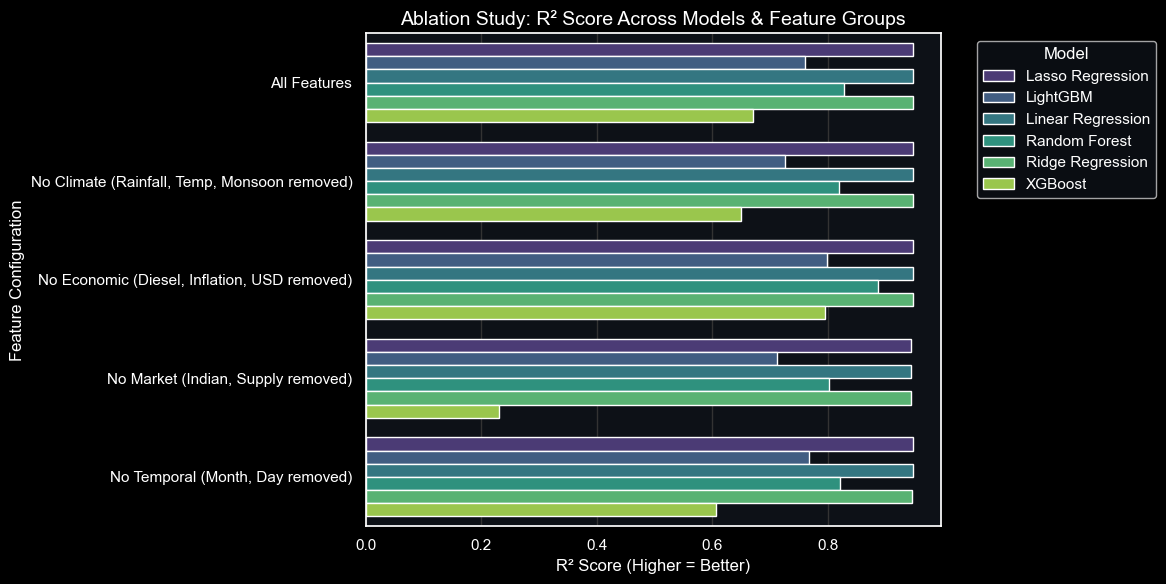

In [53]:
# ==============================================================
# ✅ MULTI-MODEL ABLATION STUDY (Feature Group Impact Analysis)
# ==============================================================

import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# ==============================================================
# ✅ STEP 1: Define Feature Groups
# ==============================================================

feature_groups = {
    "All Features": list(X_train_scaled.columns),
    
    "No Climate (Rainfall, Temp, Monsoon removed)": [
        f for f in X_train_scaled.columns 
        if not any(x in f.lower() for x in ["rain", "temp", "monsoon"])
    ],
    
    "No Economic (Diesel, Inflation, USD removed)": [
        f for f in X_train_scaled.columns 
        if not any(x in f.lower() for x in ["diesel", "inflation", "usd"])
    ],
    
    "No Market (Indian, Supply removed)": [
        f for f in X_train_scaled.columns 
        if not any(x in f.lower() for x in ["indian", "supply"])
    ],
    
    "No Temporal (Month, Day removed)": [
        f for f in X_train_scaled.columns 
        if not any(x in f.lower() for x in ["month", "day"])
    ]
}

print("✅ Feature groups defined successfully.")
print(f"Total features available: {len(X_train_scaled.columns)}\n")

# ==============================================================
# ✅ STEP 2: Select Models for Ablation
# ==============================================================

models_ablation = {
    "Linear Regression": models["Linear Regression"],
    "Ridge Regression": models["Ridge Regression"],
    "Lasso Regression": models["Lasso Regression"],
    "Random Forest": models["Random Forest"],
    "XGBoost": models["XGBoost"],
    "LightGBM": models["LightGBM"]
}

print("✅ Models loaded for ablation study.\n")

# ==============================================================
# ✅ STEP 3: Run Ablation Study
# ==============================================================

ablation_results = []

for model_name, model in models_ablation.items():
    print(f"\n🔹 Running Ablation for: {model_name}")
    
    for group_name, feature_subset in feature_groups.items():
        valid_features = [f for f in feature_subset if f in X_train_scaled.columns]
        
        try:
            # --- Train model ---
            model.fit(X_train_scaled[valid_features], y_train)
            
            # --- Predict on test set ---
            y_pred = model.predict(X_test_scaled[valid_features])
            
            # --- Compute metrics ---
            rmse = np.sqrt(mean_squared_error(y_test, y_pred))
            mae = mean_absolute_error(y_test, y_pred)
            r2 = r2_score(y_test, y_pred)
            
            ablation_results.append([
                model_name, group_name, rmse, mae, r2
            ])
            
            print(f"✅ {group_name}: RMSE={rmse:.3f}, MAE={mae:.3f}, R²={r2:.3f}")
        
        except Exception as e:
            print(f"⚠️ {model_name} - {group_name} skipped due to error: {e}")
            ablation_results.append([model_name, group_name, np.nan, np.nan, np.nan])

# ==============================================================
# ✅ STEP 4: Format and Display Results
# ==============================================================

ablation_df = pd.DataFrame(
    ablation_results,
    columns=["Model", "Configuration", "RMSE", "MAE", "R²"]
).sort_values(by=["Model", "Configuration"]).reset_index(drop=True)

print("\n📊 Multi-Model Ablation Study Results:")
display(ablation_df.round(4))

# Save results to CSV
ablation_df.to_csv("Ablation_Study_Results.csv", index=False)
print("💾 Results saved successfully to: Ablation_Study_Results.csv")

# ==============================================================
# ✅ STEP 5: Optional Visualization
# ==============================================================

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.barplot(
    data=ablation_df,
    x="R²",
    y="Configuration",
    hue="Model",
    palette="viridis"
)
plt.title("Ablation Study: R² Score Across Models & Feature Groups", fontsize=14)
plt.xlabel("R² Score (Higher = Better)")
plt.ylabel("Feature Configuration")
plt.legend(title="Model", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()
